# Analysis of experimental data

This notebook is about the reproduction of the figures presented in the paper

In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

import pandas as pd
import numpy as np
import torch

import matplotlib.pyplot as plt
import seaborn as sns

from config import ROOT, DATA

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score
from config import *

from scipy.stats import *
from sklearn.linear_model import *
from sklearn.preprocessing import * 

from sklearn.tree import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.metrics import *

from importlib import reload

sns.set_style("whitegrid")
del matplotlib.rcParams
reload(matplotlib)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300



## Loading the data

In [104]:
def mcherry_threshold(x):
    if x < 0.2:
        return 0
    if x < 0.5:
        return 1
    if x < 0.8:
        return 2
    return 3

batch = 2
colors = ["red","darkorange","gold","green", "gray", "gray"]
batch_color = ["gray", "blue", "orange", "purple"]


In [122]:
df = pd.read_excel(f"{DATA}/ML-designed PID.xlsx")
fx_dna = df[df.batch >= batch]["fx_dna"].apply(lambda x : float(x)).values
fx = df[df.batch  >= batch]["fx"].apply(lambda x : float(x)).values
e_rbm = df[df.batch  >= batch]["e_rbm"].apply(lambda x : float(x)).values
rmsd = df[df.batch  >= batch]["af2_rmsd"].apply(lambda x : float(x)).values
tmscore = df[df.batch  >= batch]["af2_tmscore"].apply(lambda x : float(x)).values
rosetta = df[df.batch  >= batch]["rosetta"].apply(lambda x : float(x)).values
plddt = df[df.batch  >= batch]["plddt"].apply(lambda x : float(x)).values
ptmscore = df[df.batch  >= batch]["ptmscore"].apply(lambda x : float(x)).values
sim = df[df.batch >= batch]["sim_cas9"].apply(lambda x : float(x)).values
batch_number = df[df.batch >= batch]["batch"].apply(lambda x:int(x)).values
functionality = df[df.batch  >= batch]["mcherry"].apply(lambda x:colors[mcherry_threshold(x)]).values
functionality_number = df[df.batch  >= batch]["mcherry"].apply(lambda x:mcherry_threshold(x)).values

name = df[df.batch  >= batch]["id"].values
mcherry = df[df.batch >= batch]["mcherry"].values
mcherry_std = df[df.batch >= batch]["mcherry_std"].values 

In [90]:
batch_number

array(['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green'], dtype=object)

## Distribution of activity

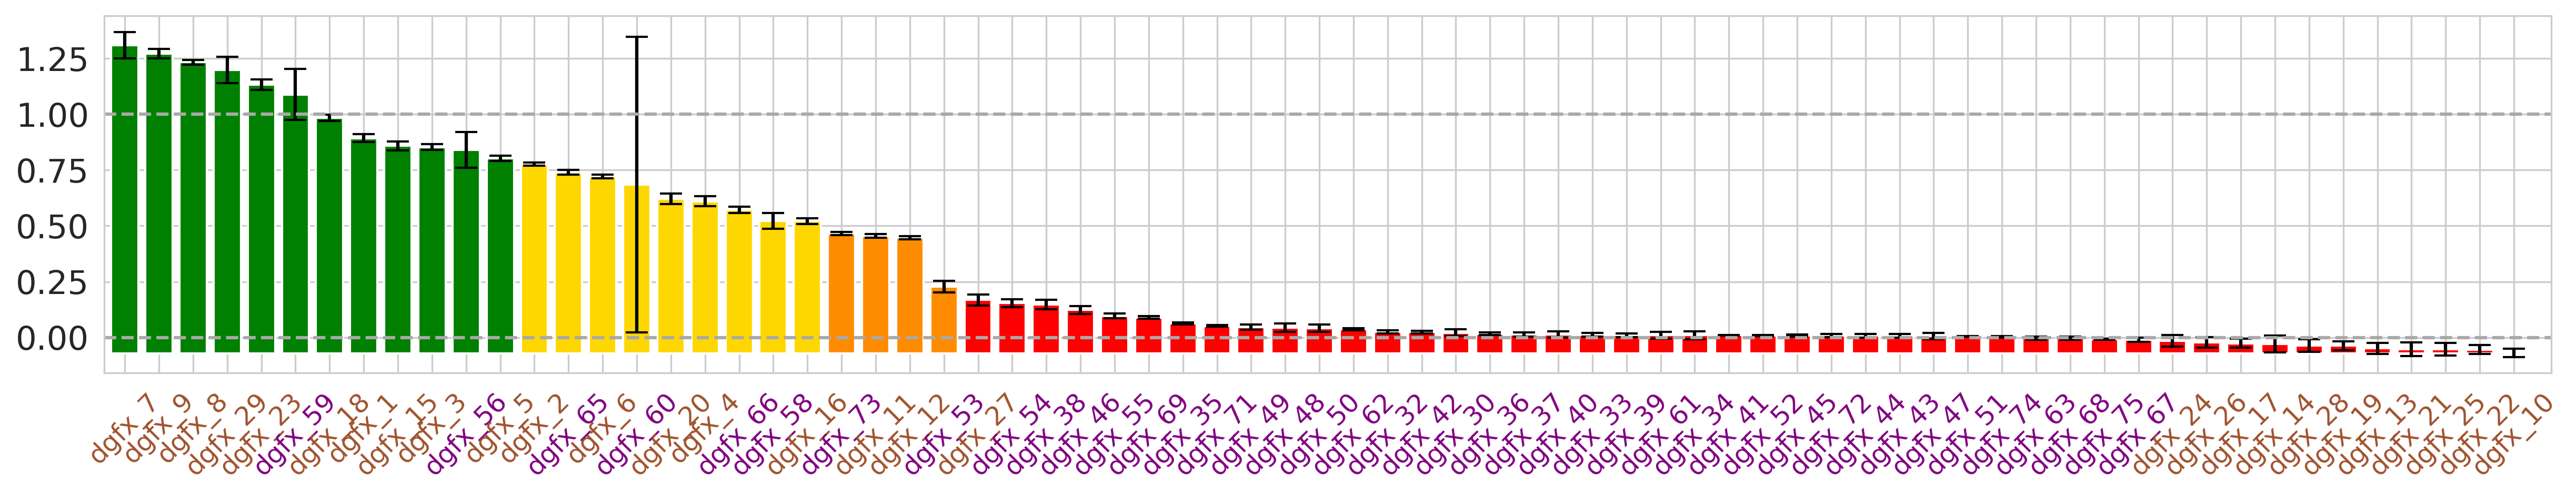

In [105]:
plt.figure(figsize=(20,3))
plt.bar(name[(-mcherry).argsort()], sorted(mcherry+0.07)[::-1], 
        color = functionality[(-mcherry).argsort()], 
        bottom = -0.07, 
       yerr = 2*mcherry_std[(-mcherry).argsort()], ecolor = "black", capsize=5)
plt.plot([-10,100],[1,1], "--", c="darkgray")
plt.plot([-10,100],[0,0], "--", c="darkgray")
plt.xticks(fontsize = 12,rotation = 45)
plt.yticks(fontsize = 15)
plt.xlim(-0.6,71.1)
plt.show()

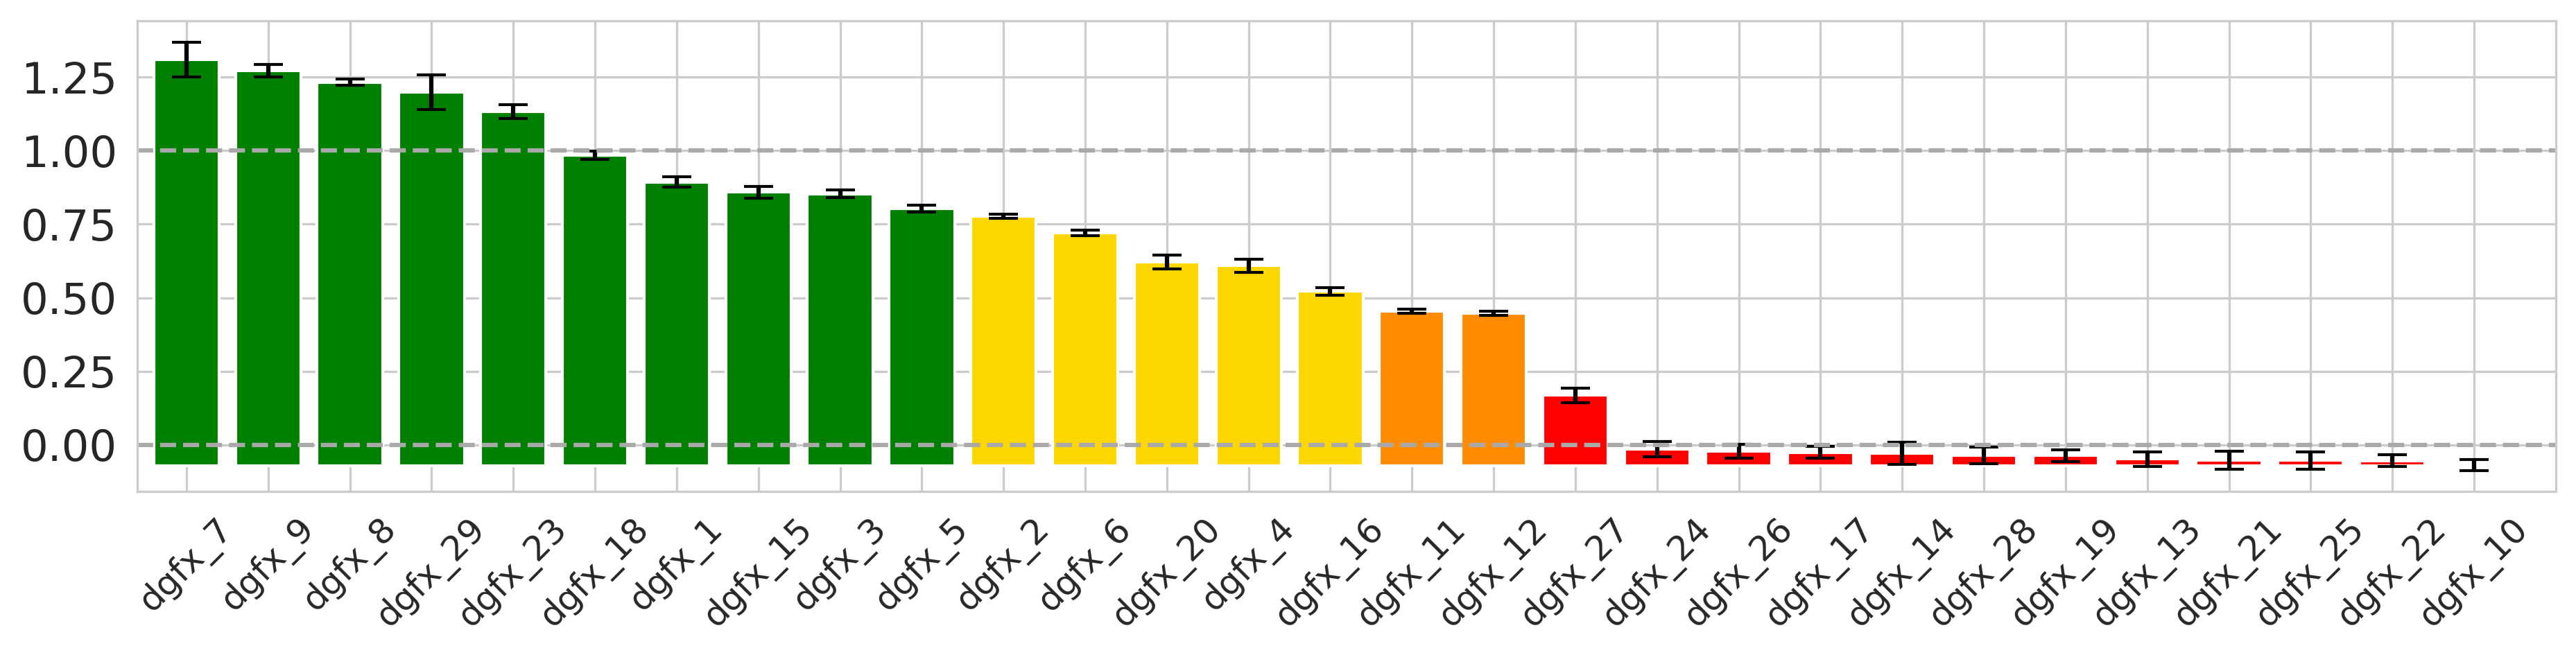

In [139]:
plt.figure(figsize=(15,3))
plt.bar(name[batch_number==2][(-mcherry)[batch_number==2].argsort()], sorted(mcherry[batch_number==2]+0.07)[::-1], 
        color = functionality[batch_number==2][(-mcherry)[batch_number==2].argsort()], 
        bottom = -0.07, 
       yerr = 2*mcherry_std[batch_number==2][(-mcherry)[batch_number==2].argsort()], ecolor = "black", capsize=5)
plt.plot([-10,100],[1,1], "--", c="darkgray")
plt.plot([-10,100],[0,0], "--", c="darkgray")
plt.xticks(fontsize = 12,rotation = 45)
plt.yticks(fontsize = 15)
plt.xlim(-0.6,sum(batch_number==2))
plt.ylim()
plt.show()

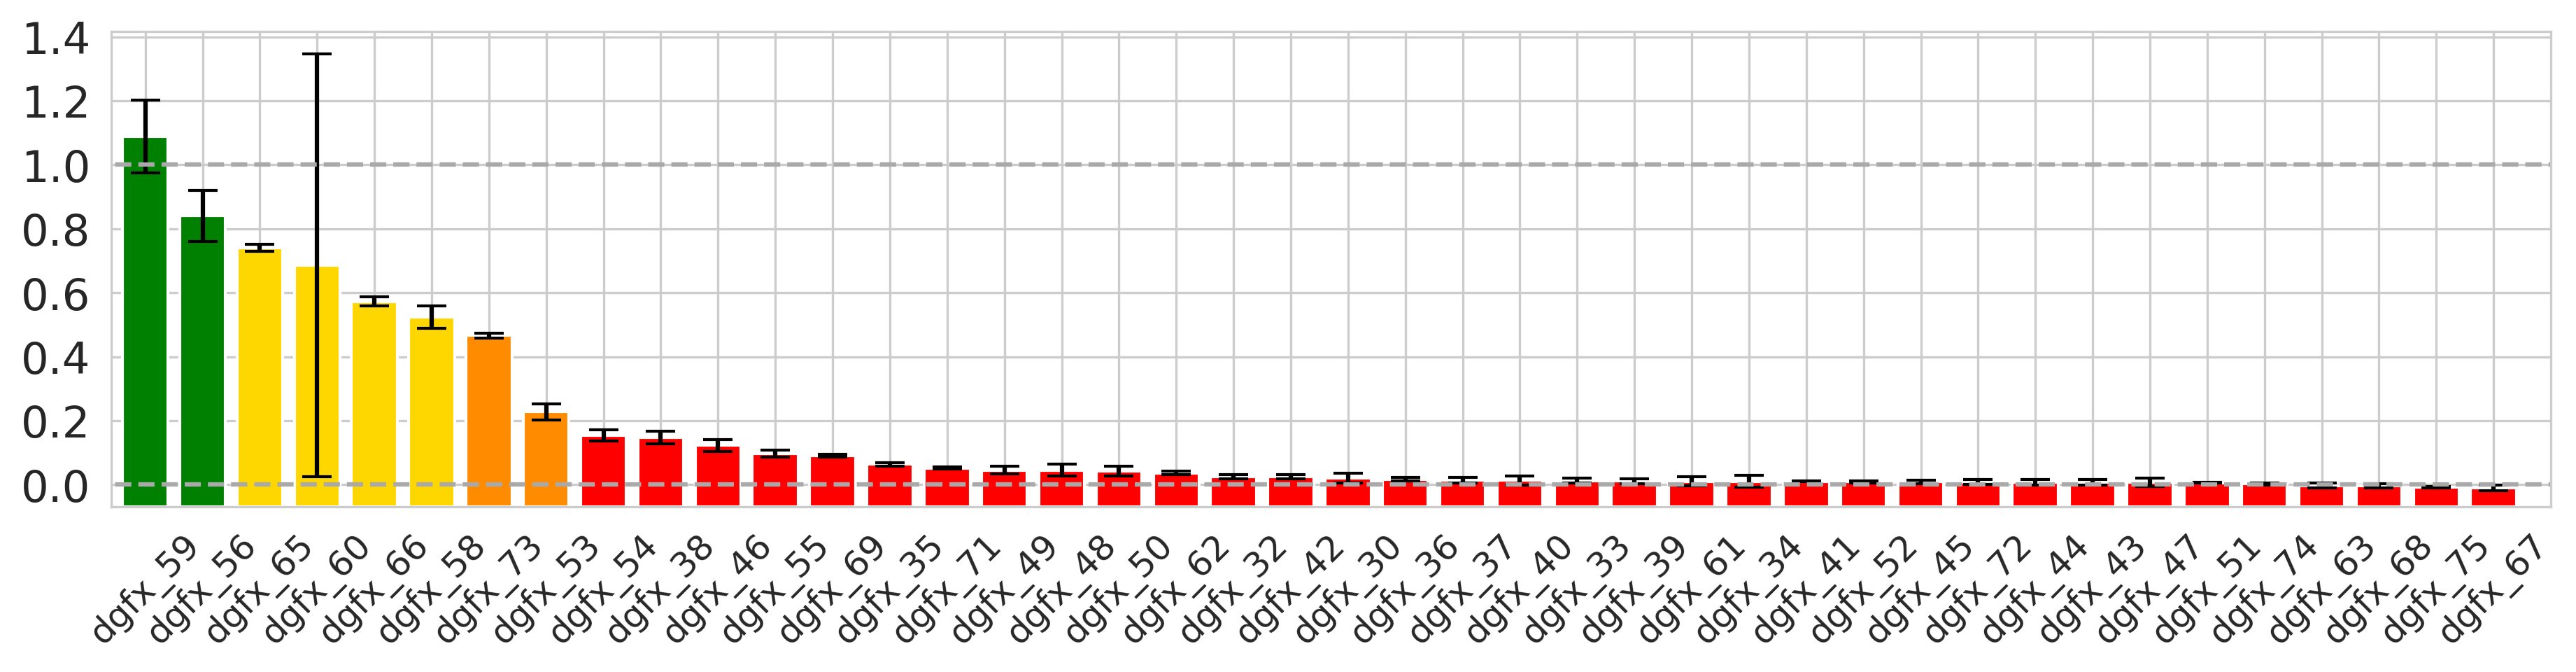

In [140]:
plt.figure(figsize=(15,3))
plt.bar(name[batch_number==3][(-mcherry)[batch_number==3].argsort()], 
        sorted(mcherry[batch_number==3]+0.07)[::-1], 
        color = functionality[batch_number==3][(-mcherry)[batch_number==3].argsort()], 
        bottom = -0.07, 
       yerr = 2*mcherry_std[batch_number==3][(-mcherry)[batch_number==3].argsort()], 
        ecolor = "black", capsize=5)
plt.plot([-10,100],[1,1], "--", c="darkgray")
plt.plot([-10,100],[0,0], "--", c="darkgray")
plt.xticks(fontsize = 12,rotation = 45)
plt.yticks(fontsize = 15)
plt.xlim(-0.6,sum(batch_number==3))
plt.show()

## Correlation between activity and scores and between scores

Here we list the scores we want to analyse

In [109]:
x = np.array([e_rbm,  fx_dna, rmsd, tmscore, plddt,])
labels = ["RBM Energy", "FoldX Energy", "AlphaFold - RMSD", "AlphaFold - TM Score", "pLDDT"]

In [ ]:
x = np.array([e_rbm,  fx_dna, rmsd])
labels = ["RBM Energy", "FoldX Energy", "AlphaFold - RMSD"]

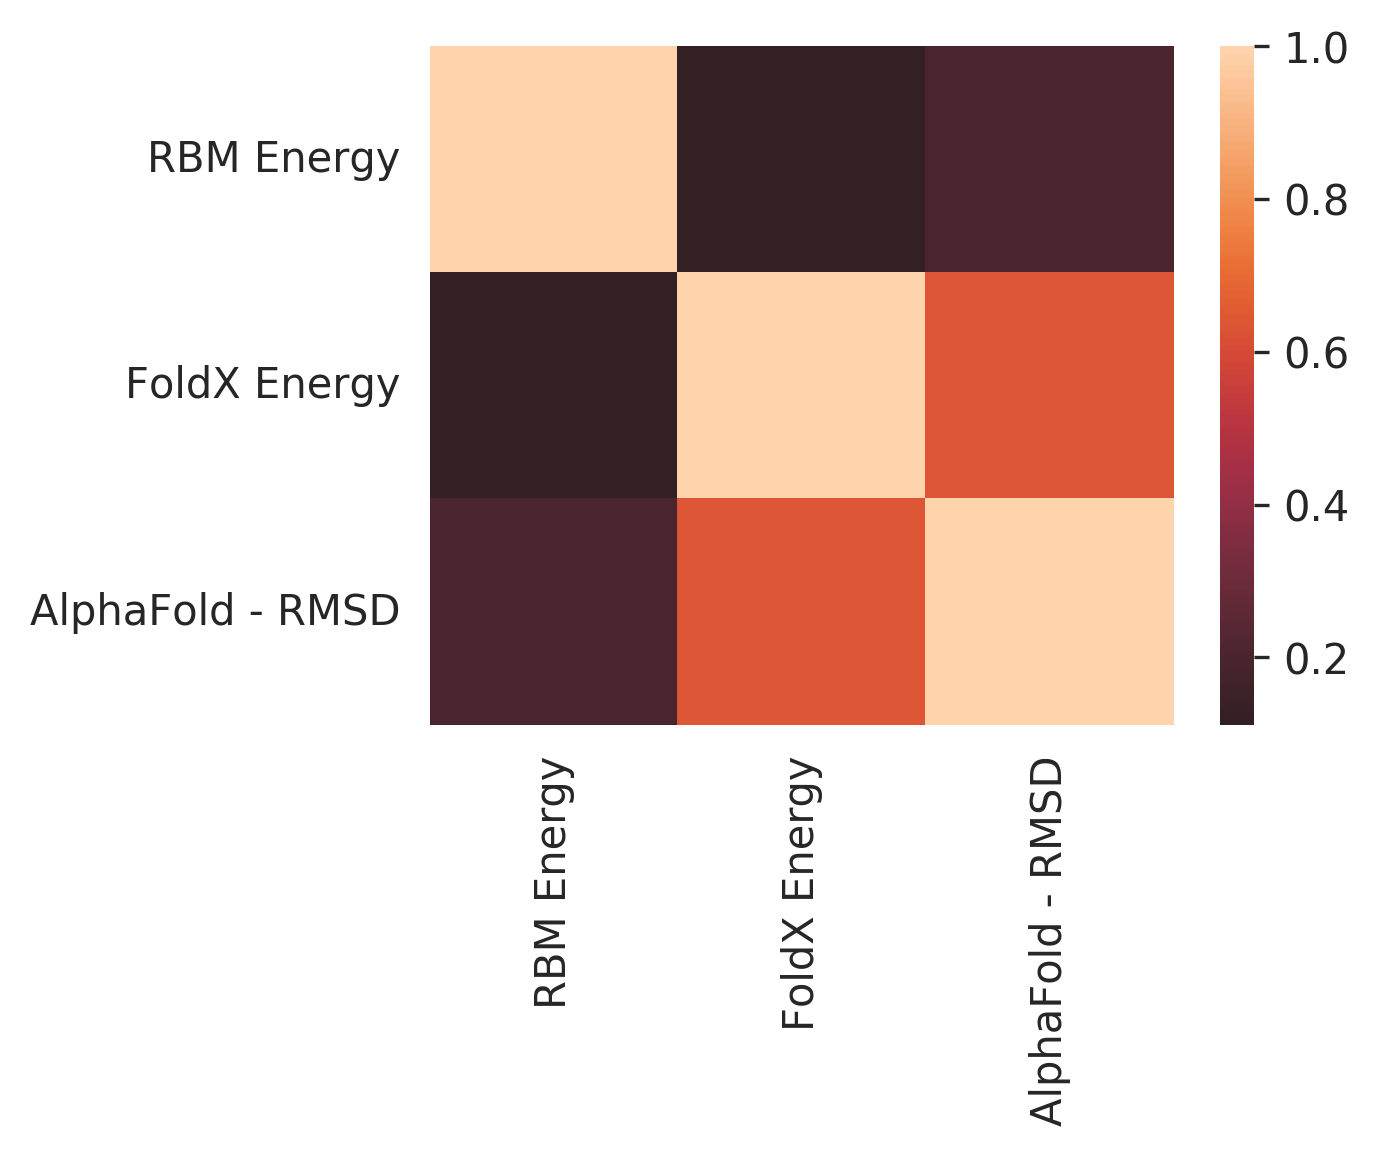

In [110]:
plt.figure(figsize = (4,3))
sns.heatmap(np.abs(np.corrcoef(x)), xticklabels = labels,  yticklabels = labels, center=0)
plt.xticks(rotation = 90)
plt.show()

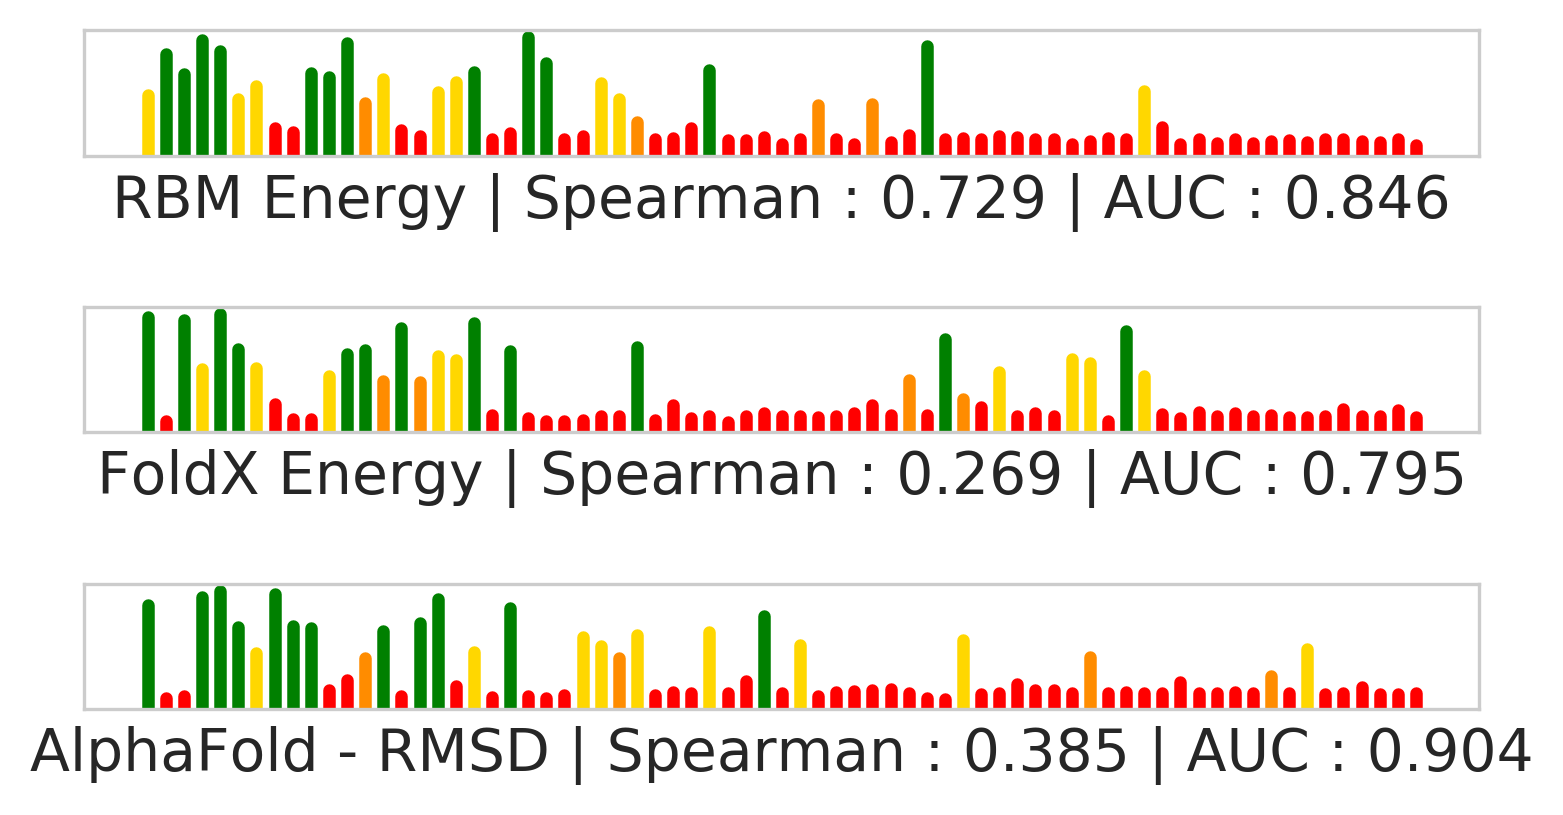

In [112]:
import random
from scipy.stats import spearmanr
from sklearn.metrics import *

colors = ["red","darkorange","gold","green"]

plt.figure(figsize = (6,3))
plt.subplots_adjust( 
                    hspace=1.2)

for i, (x_, lab) in enumerate(zip(x, labels)):
    if spearmanr(mcherry, x_)[0]>0:
        x_ = -x_
    plt.subplot(len(labels), 1, i+1)
    for x__, col, bar in zip(x_.argsort().argsort(), functionality, mcherry):
        plt.plot([x__,x__], [-.2,bar], c = col, linewidth=3, )
    plt.xlabel(f"{lab} | Spearman : {-spearmanr(x_, mcherry)[0]:.3f} | AUC : {roc_auc_score(np.where(mcherry>0.8,1,0), -x_):.3f}",size=14,)
    plt.yticks([])
    plt.xticks([])
    plt.ylim(-0.2,1.4)
    plt.xticks(size=12)
plt.show()


In [124]:
x = np.array([e_rbm,  fx_dna, rmsd, tmscore, plddt,])
labels = ["RBM Energy", "FoldX Energy", "AlphaFold - RMSD", "AlphaFold - TM Score", "pLDDT"]

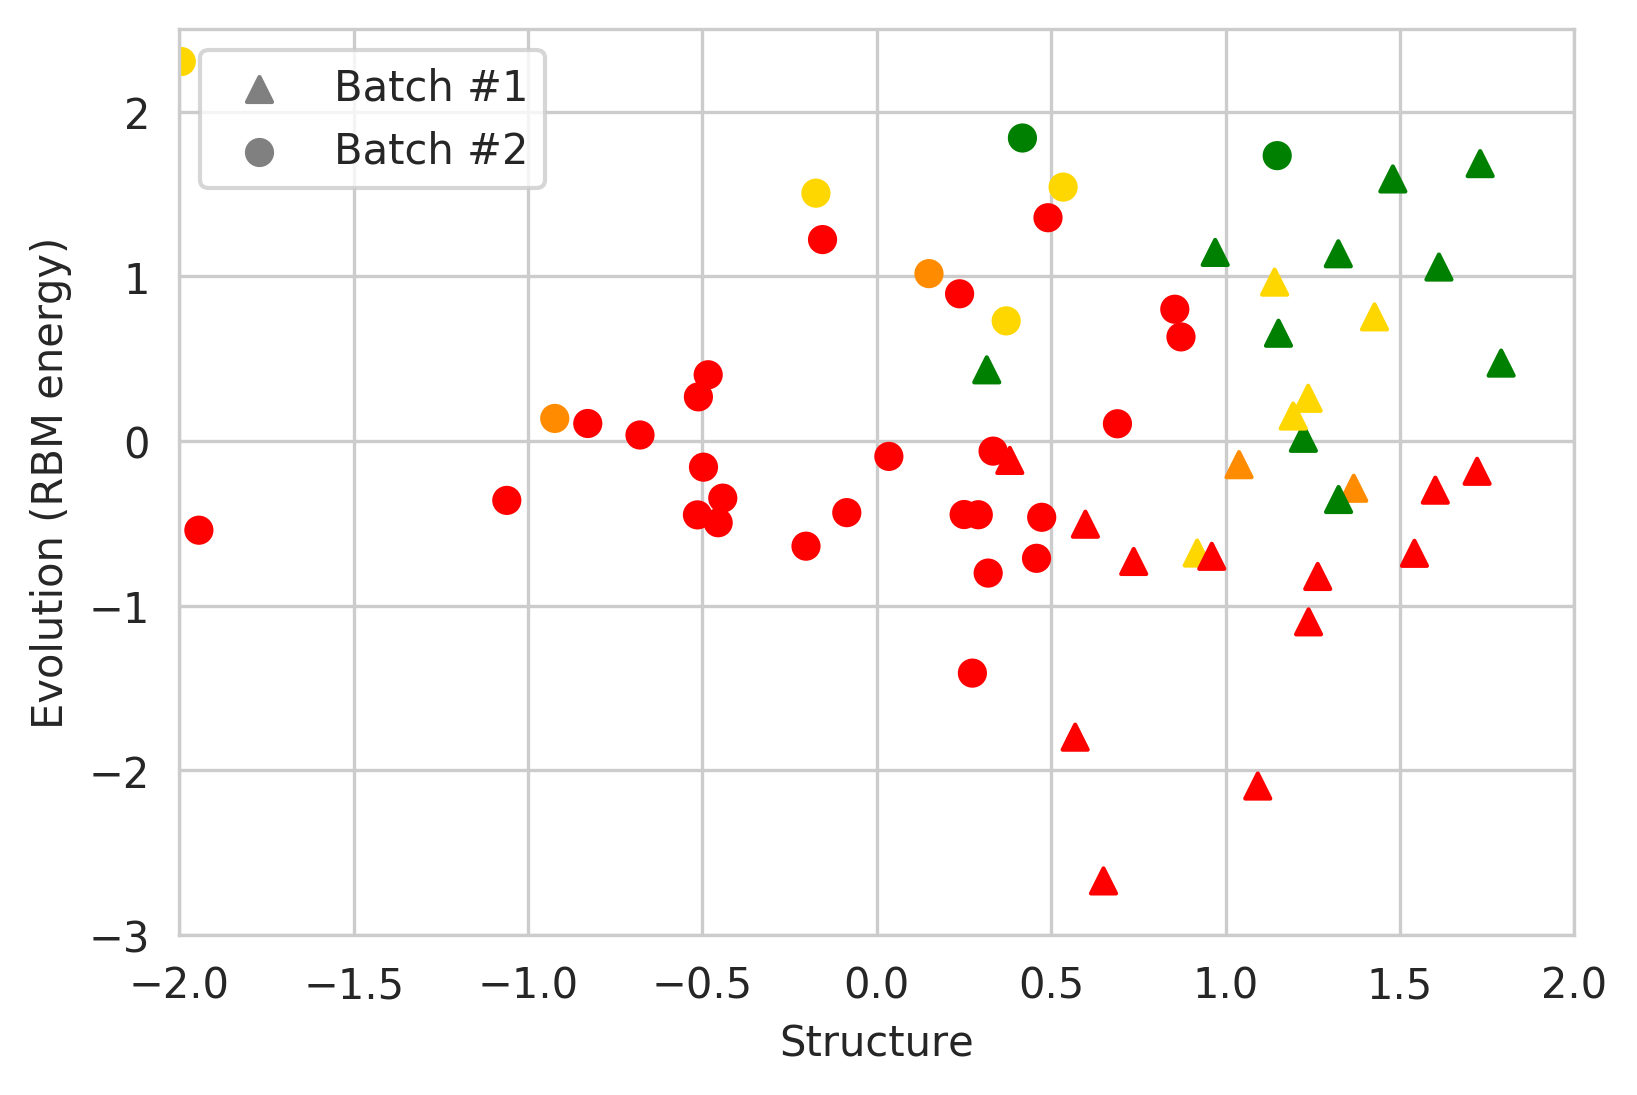

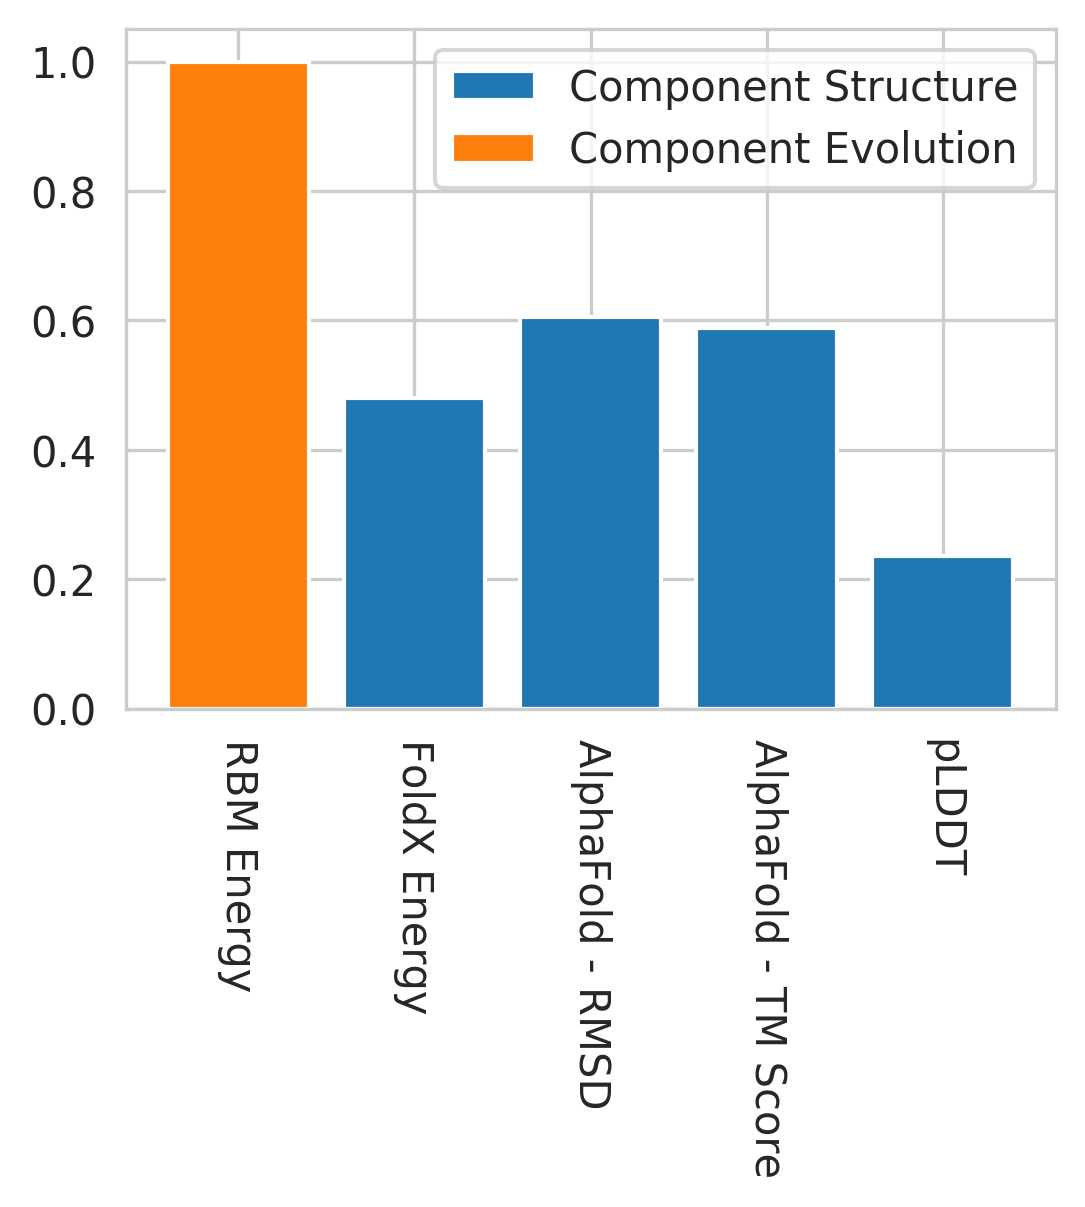

In [128]:
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

pcaer = SparsePCA(2, alpha = 2)
rep = pcaer.fit_transform(scaler.fit_transform(x.T))
rep[:,0] = -rep[:,0]
rep[:,1] = rep[:,1]
plt.scatter([],[], color = "gray", marker="^")
plt.scatter([],[], color = "gray")

plt.scatter(rep[batch_number==2,0], rep[batch_number==2,1], color= functionality[batch_number==2], marker = "^")
plt.scatter(rep[batch_number==3,0], rep[batch_number==3,1], color= functionality[batch_number==3])
plt.legend(["Batch #1", "Batch #2"])

plt.xlabel("Structure")
plt.ylabel("Evolution (RBM energy)")
plt.xlim(-2,2)
plt.ylim(-3,2.5)

plt.show()

plt.figure(figsize = (4,3))
plt.bar(labels, np.abs(pcaer.components_[0]))
plt.bar(labels, np.abs(pcaer.components_[1]))
plt.legend(["Component Structure", "Component Evolution"])
plt.xticks(rotation = -90)

plt.show()

In [949]:
cas9_idx = np.where(X_labelled[0,0]==0)[0]
red = (1,0,0)
white = (1,1,1)
green = (0,1,0)
vals = gaussian_filter1d(x_good2[:,nnz_idx].sum(0)/(x_all[:,nnz_idx].sum(0)), sigma=n)
vals = (vals-vals.min())/(vals.max()-vals.min())
#vals = 2*vals - 1
last_val = vals[0]
last_key = 0
for key in range(len(np.where(X_labelled[0,0] == 0)[0])):
    if cas9_idx[key] in nnz_idx:
        last_val = vals[last_key]
        last_key +=1
    #print(f"color /a rgb({last_val},0,0) targ {1102+key}")
        color0 = last_val*red[0]+(1-last_val)*green[0]
        color1 = last_val*red[1]+(1-last_val)*green[1]
        color2 = last_val*red[2]+(1-last_val)*green[2]
        print(f"color /a:{1102+key}  rgb({color0},{color1},{color2})")
    else:
        print(f"color /a:{1102+key}  rgb(.5,.5,.5)")
print(f"color /c  blue")
print(f"color /d  blue")


color /a:1102  rgb(0.0,1.0,0.0)
color /a:1103  rgb(.5,.5,.5)
color /a:1104  rgb(0.011122943833470345,0.9888770561665297,0.0)
color /a:1105  rgb(.5,.5,.5)
color /a:1106  rgb(.5,.5,.5)
color /a:1107  rgb(0.03432728722691536,0.9656727127730846,0.0)
color /a:1108  rgb(0.07040809094905853,0.9295919090509415,0.0)
color /a:1109  rgb(0.11836639791727066,0.8816336020827293,0.0)
color /a:1110  rgb(0.17420177161693573,0.8257982283830643,0.0)
color /a:1111  rgb(0.23129715025424957,0.7687028497457504,0.0)
color /a:1112  rgb(0.28240692615509033,0.7175930738449097,0.0)
color /a:1113  rgb(0.3221832513809204,0.6778167486190796,0.0)
color /a:1114  rgb(0.3484845459461212,0.6515154540538788,0.0)
color /a:1115  rgb(0.36153435707092285,0.6384656429290771,0.0)
color /a:1116  rgb(.5,.5,.5)
color /a:1117  rgb(0.3616981506347656,0.6383018493652344,0.0)
color /a:1118  rgb(.5,.5,.5)
color /a:1119  rgb(.5,.5,.5)
color /a:1120  rgb(.5,.5,.5)
color /a:1121  rgb(0.3480965495109558,0.6519034504890442,0.0)
color /a:112

In [81]:
from tqdm import tqdm_notebook
from torchpgm.data import RBMDataWithPAM, RBMData
from sklearn.multioutput import MultiOutputClassifier
from torch.dataloader import DataLoader

Npam=5
train_dataset_labelled = RBMDataWithPAM(f"{DATA}/vink/data.pt", Npam, subset = "train_labelled")
val_dataset_labelled = RBMDataWithPAM(f"{DATA}/vink/data.pt", Npam, subset = "val_labelled")
val_loader_labelled = DataLoader(val_dataset_labelled, batch_size = 1000, shuffle = False)

gammas = [1]+ [1.4**i/1000 for i in range(50)]+[0]+[2*1.05**i for i in range(50)]+[1e-7*1.05**i for i in range(100)]+[1.4**i/1000 for i in range(50)]+[0.01*1.05**i for i in range(150)]+[0.0001*1.05**i for i in range(100)]+[1e-5*1.05**i for i in range(50)]+[20*1.08**i for i in range(50)]
gammas = sorted(gammas)
gammas = gammas[260:542]

spears = []
es = []
preds = []
cs = []
X_train = torch.stack(train_dataset_labelled.x_d,0).detach().float()
Y_train = train_dataset_labelled.y
X_test = torch.stack(val_dataset_labelled.x_d,0).detach().float()
Y_test = val_dataset_labelled.y
with torch.no_grad():
    for gamma in tqdm_notebook(gammas):
        model_full_name = f"rbmssl2_pid_h{Nh}_npam{Npam}_gamma{gamma}"
        model_rbm.load(f"{DATA}/vink/weights/{model_full_name}_90.h5")
        model_rbm.eval()
        
        #preds.append(model_rbm.val_classifier(val_loader_labelled, ["pi"], ["hidden"], 0))
        h_train = model_rbm.edges["pi -> hidden"](X_train, sample = False)
        h_test = model_rbm.edges["pi -> hidden"](X_test, sample = False)        
        c = (model_rbm.classifier(h_test)>0.5).int()

        clf = MultiOutputClassifier(LogisticRegression()).fit(h_train, Y_train)
        pred_reg = np.array(clf.predict(h_test))
        preds.append([np.mean([balanced_accuracy_score(y,pred) for y, pred in zip(Y_test.T, c.T)]), np.mean([balanced_accuracy_score(y,pred) for y, pred in zip(Y_test.T, pred_reg.T)])])
        e_rbm = model_rbm({"pi":X_labelled[np.where(df.batch  >= batch)]})
        h_expe =  model_rbm.edges["pi -> hidden"](X_labelled[np.where(df.batch  >= batch)], sample = False)
        
        loo = LeaveOneOut()
        expe_preds = np.zeros(len(h_expe))
        for train_index, test_index in loo.split(h_expe):
            clf = LogisticRegression().fit(h_expe[train_index], (mcherry[train_index]>0.6))
            expe_preds[test_index] = clf.predict_proba(h_expe[test_index])[:,1]
        es.append(e_rbm)
        spears.append((spearmanr(mcherry, e_rbm)[0], roc_auc_score(mcherry>0.6, expe_preds)))

ModuleNotFoundError: No module named 'torch.dataloader'

In [25]:
from scipy.ndimage import *

n = 20

fig, ax = plt.subplots()

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx()]

# Make some space on the right side for the extra y-axis.
#fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
#axes[-1].spines['right'].set_position(('axes', 1.2))
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

axes[-1].set_yticks(ticks=[])

# And finally we get to plot things...
colors = ('Red', 'Blue', 'Green')

values = np.array([x[1] for x in preds])
fvalues = gaussian_filter1d(values[1:],n, mode="nearest")
errors = np.array([np.std(values[i:i+n]) for i in range(1,len(values)-n)])/2
axes[0].plot(gammas[1:], gaussian_filter1d(values[1:],n,  mode="nearest"), c="blue")
axes[0].fill_between(gammas[n//2+1:-n//2], fvalues[n//2:-n//2]-errors, fvalues[n//2:-n//2]+errors, color="blue", alpha = 0.2)
axes[0].set_ylabel('Balanced accuracy (validation set)' , color=colors[1])
axes[0].tick_params(axis='y', colors=colors[1])
axes[0].set_yticks(np.arange(0.805,0.835,0.005))

axes[0].set_ylim(0.80,0.835)




#values = np.array([x[1] for x in preds])
#axes[1].plot(gammas[n-1:], [np.mean([x for j,x in enumerate(values[i:i+n])])  for i in range(len(values[:])-n+1)], 
             #color=colors[2])
#axes[1].plot(gammas[n-1:],values[n-1:], color=colors[2], alpha=0.2)


plt.xscale("log")
plt.xlim(1e-1,50)
axes[0].set_xlabel("Gamma (strength of the classifier)")
#plt.legend(["Spearmanr", "Classifier", "Classifier Retrained"])
plt.show()


NameError: name 'preds' is not defined

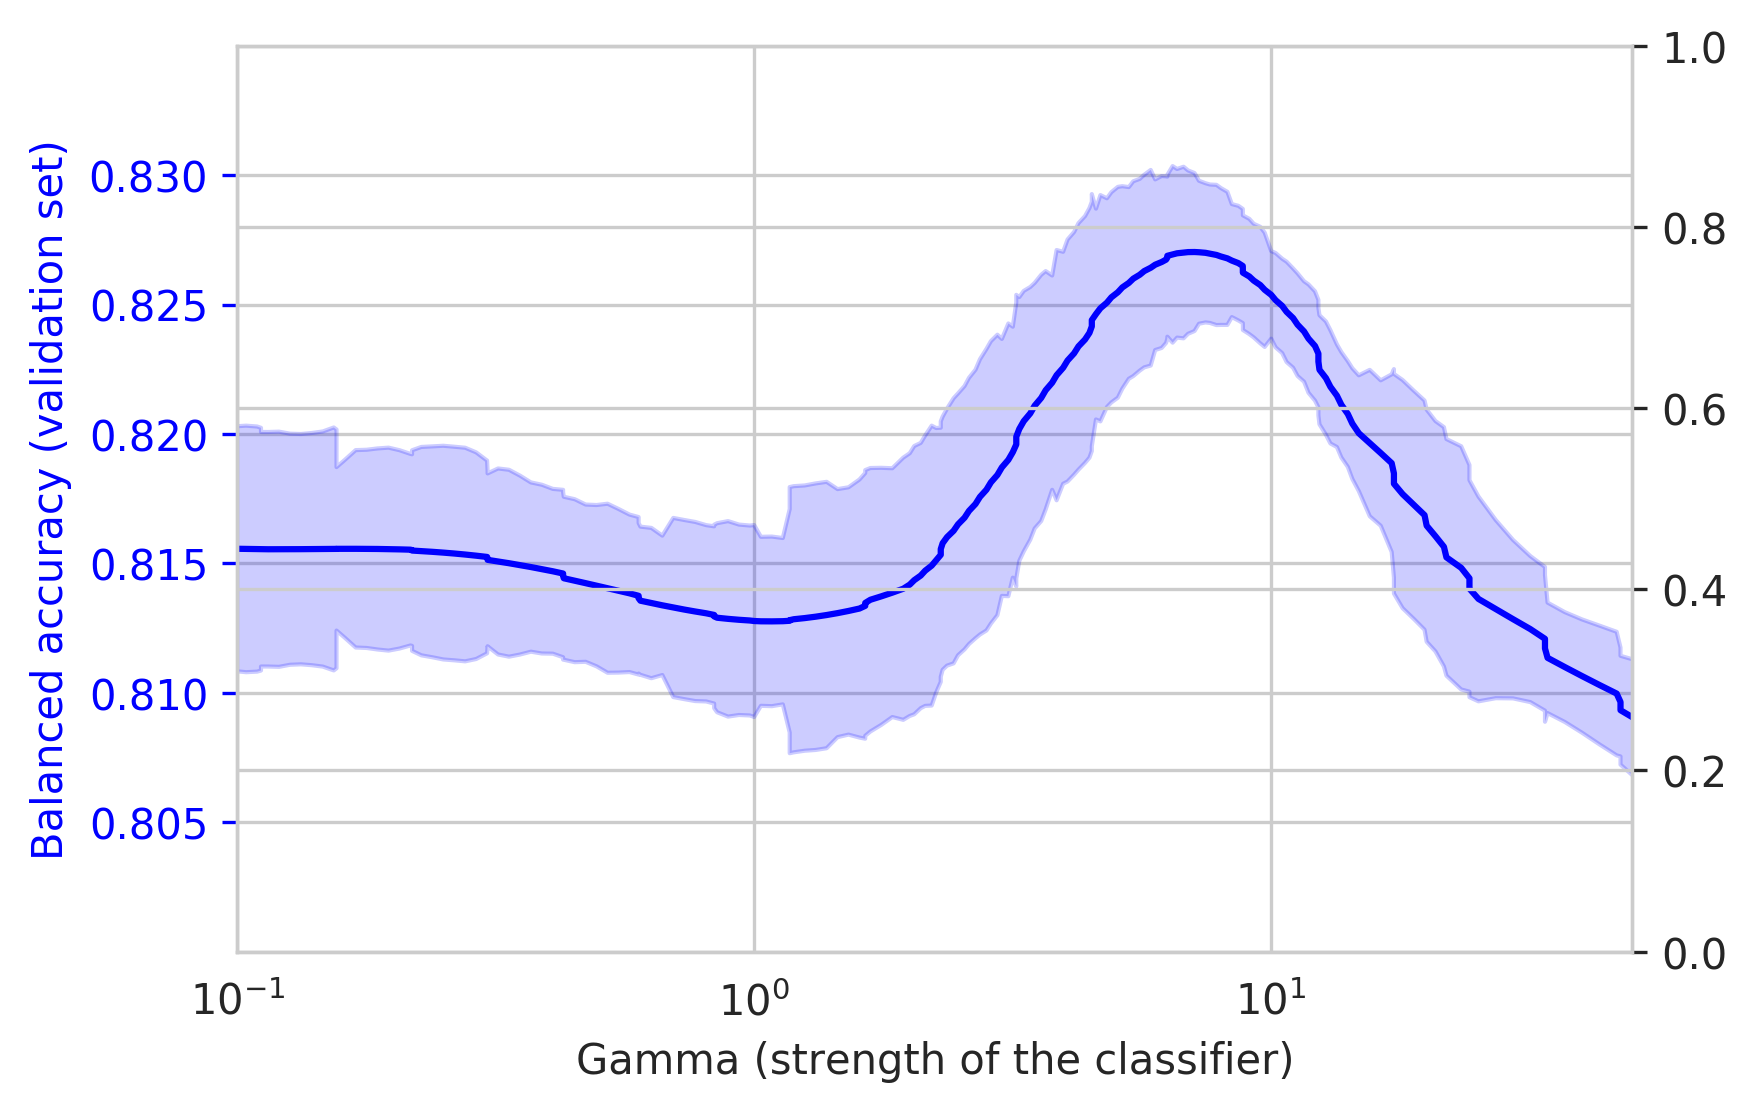

In [28]:
from scipy.ndimage import *

n = 20

fig, ax = plt.subplots()

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx()]

# Make some space on the right side for the extra y-axis.
#fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
#axes[-1].spines['right'].set_position(('axes', 1.2))
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)



# And finally we get to plot things...
colors = ('Red', 'Blue', 'Green')

values = np.array([x[1] for x in preds])
fvalues = gaussian_filter1d(values[1:],n, mode="nearest")
errors = np.array([np.std(values[i:i+n]) for i in range(1,len(values)-n)])/2
axes[0].plot(gammas[1:], gaussian_filter1d(values[1:],n,  mode="nearest"), c="blue")
axes[0].fill_between(gammas[n//2+1:-n//2], fvalues[n//2:-n//2]-errors, fvalues[n//2:-n//2]+errors, color="blue", alpha = 0.2)
axes[0].set_ylabel('Balanced accuracy (validation set)' , color=colors[1])
axes[0].tick_params(axis='y', colors=colors[1])
axes[0].set_yticks(np.arange(0.805,0.835,0.005))

axes[0].set_ylim(0.80,0.835)


values = np.array([x[0] for x in spears])
fvalues = gaussian_filter1d(values[1:],n, mode="nearest")
errors = np.array([np.std(values[i:i+n]) for i in range(1,len(values)-n)])
axes[1].plot(gammas[1:], gaussian_filter1d(values[1:],n,  mode="nearest"), c="red")
axes[1].fill_between(gammas[n//2+1:-n//2], fvalues[n//2:-n//2]-errors, fvalues[n//2:-n//2]+errors, color="red", alpha = 0.2)
axes[1].set_ylabel('Spearmanr (experimental)' , color=colors[0])
axes[1].tick_params(axis='y', colors=colors[0])
axes[1].set_yticks(np.arange(0.56,0.7,0.02))
axes[1].set_ylim(0.56,0.7)




#values = np.array([x[1] for x in preds])
#axes[1].plot(gammas[n-1:], [np.mean([x for j,x in enumerate(values[i:i+n])])  for i in range(len(values[:])-n+1)], 
             #color=colors[2])
#axes[1].plot(gammas[n-1:],values[n-1:], color=colors[2], alpha=0.2)


plt.xscale("log")
plt.xlim(1e-1,50)
axes[0].set_xlabel("Gamma (strength of the classifier)")
#plt.legend(["Spearmanr", "Classifier", "Classifier Retrained"])
plt.show()


In [29]:
from scipy.ndimage import *

n = 20

fig, ax = plt.subplots()

# Twin the x-axis twice to make independent y-axes.
axes = [None, 
        ax]

# Make some space on the right side for the extra y-axis.
#fig.subplots_adjust(right=0.75)


values = np.array([x[0] for x in spears])
fvalues = gaussian_filter1d(values[1:],n, mode="nearest")
errors = np.array([np.std(values[i:i+n]) for i in range(1,len(values)-n)])
axes[1].plot(gammas[1:], gaussian_filter1d(values[1:],n,  mode="nearest"), c="red")
axes[1].fill_between(gammas[n//2+1:-n//2], fvalues[n//2:-n//2]-errors, fvalues[n//2:-n//2]+errors, color="red", alpha = 0.2)
axes[1].set_ylabel('Spearmanr (experimental)' , color=colors[0])
axes[1].tick_params(axis='y', colors=colors[0])
axes[1].set_yticks(np.arange(0.56,0.7,0.02))
axes[1].set_ylim(0.56,0.7)




#values = np.array([x[1] for x in preds])
#axes[1].plot(gammas[n-1:], [np.mean([x for j,x in enumerate(values[i:i+n])])  for i in range(len(values[:])-n+1)], 
             #color=colors[2])
#axes[1].plot(gammas[n-1:],values[n-1:], color=colors[2], alpha=0.2)


plt.xscale("log")
plt.xlim(1e-1,50)
axes[0].set_xlabel("Gamma (strength of the classifier)")
#plt.legend(["Spearmanr", "Classifier", "Classifier Retrained"])
plt.show()


AttributeError: 'NoneType' object has no attribute 'set_xlabel'

In [ ]:
plt.figure(figsize = (8,1))
for x, col in zip(tmscore, functionality):
    epsilon = 0 #0.01*(random.random()-0.5)
    plt.plot([x+epsilon,x+epsilon], [0,1], c = col, linewidth=1.3,)
plt.xlabel(f"AlphaFold TM-score (Spear : {np.abs(spearmanr(tmscore, mcherry)[0]):.3f})",size=14)
plt.yticks([])
plt.ylim(0,1)
plt.xticks(size=14)
plt.show()

plt.figure(figsize = (8,1))
for x, col in zip(plddt, functionality):
    epsilon = 0 #0.01*(random.random()-0.5)
    plt.plot([x+epsilon,x+epsilon], [0,1], c = col, linewidth=1.3,)
plt.xlabel(f"AlphaFold pLLDT (Spear : {np.abs(spearmanr(plddt, mcherry)[0]):.3f})",size=14)
plt.yticks([])
plt.ylim(0,1)
plt.xticks(size=14)
plt.show()

plt.figure(figsize = (8,1))
for x, col in zip(ptmscore, functionality):
    epsilon = 0# 0.01*(random.random()-0.5)
    plt.plot([x+epsilon,x+epsilon], [0,1], c = col, linewidth=1.3,)
plt.xlabel(f"AlphaFold pTM-score (Spear : {np.abs(spearmanr(ptmscore, mcherry)[0]):.3f})",size=14)
plt.yticks([])
plt.ylim(0,1)
plt.xticks(size=14)
plt.show()

plt.figure(figsize = (8,1))
for x, col in zip(sim, functionality):
    epsilon = 0.5*(random.random()-0.5)
    plt.plot([x+epsilon,x+epsilon], [0,1], c = col, linewidth=1.3,)
plt.xlabel(f"Hamming Distance with WT (Spear : {np.abs(spearmanr(rmsd, mcherry)[0]):.3f})",size=14)
plt.yticks([])
plt.ylim(0,1)
plt.xticks(size=14)
plt.show()


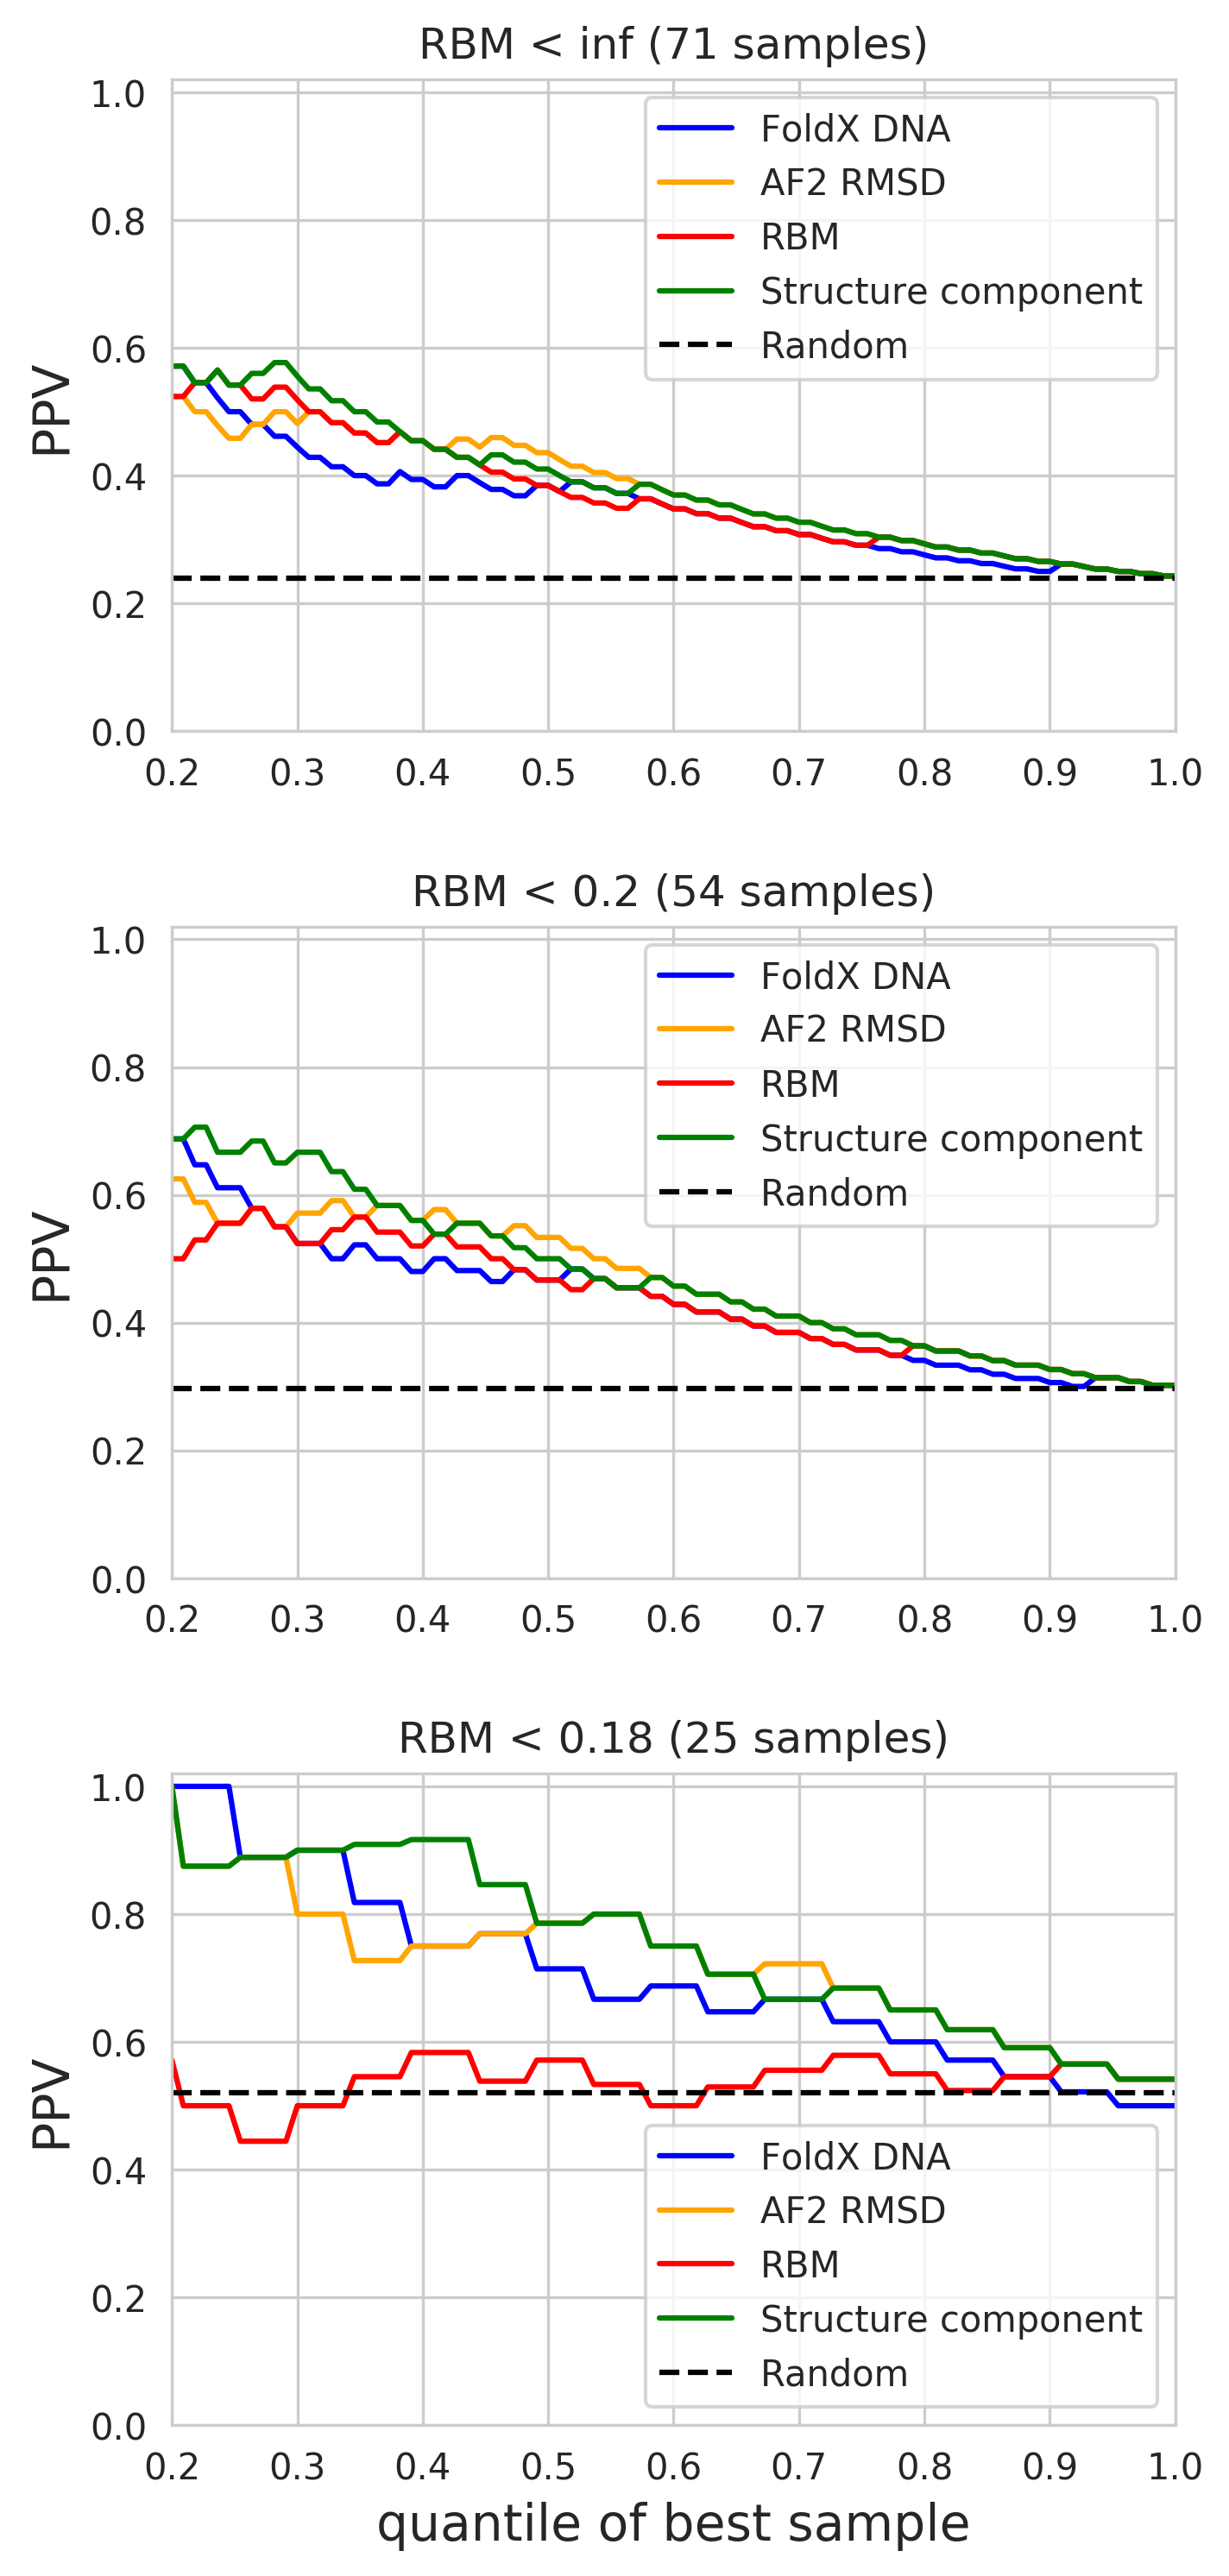

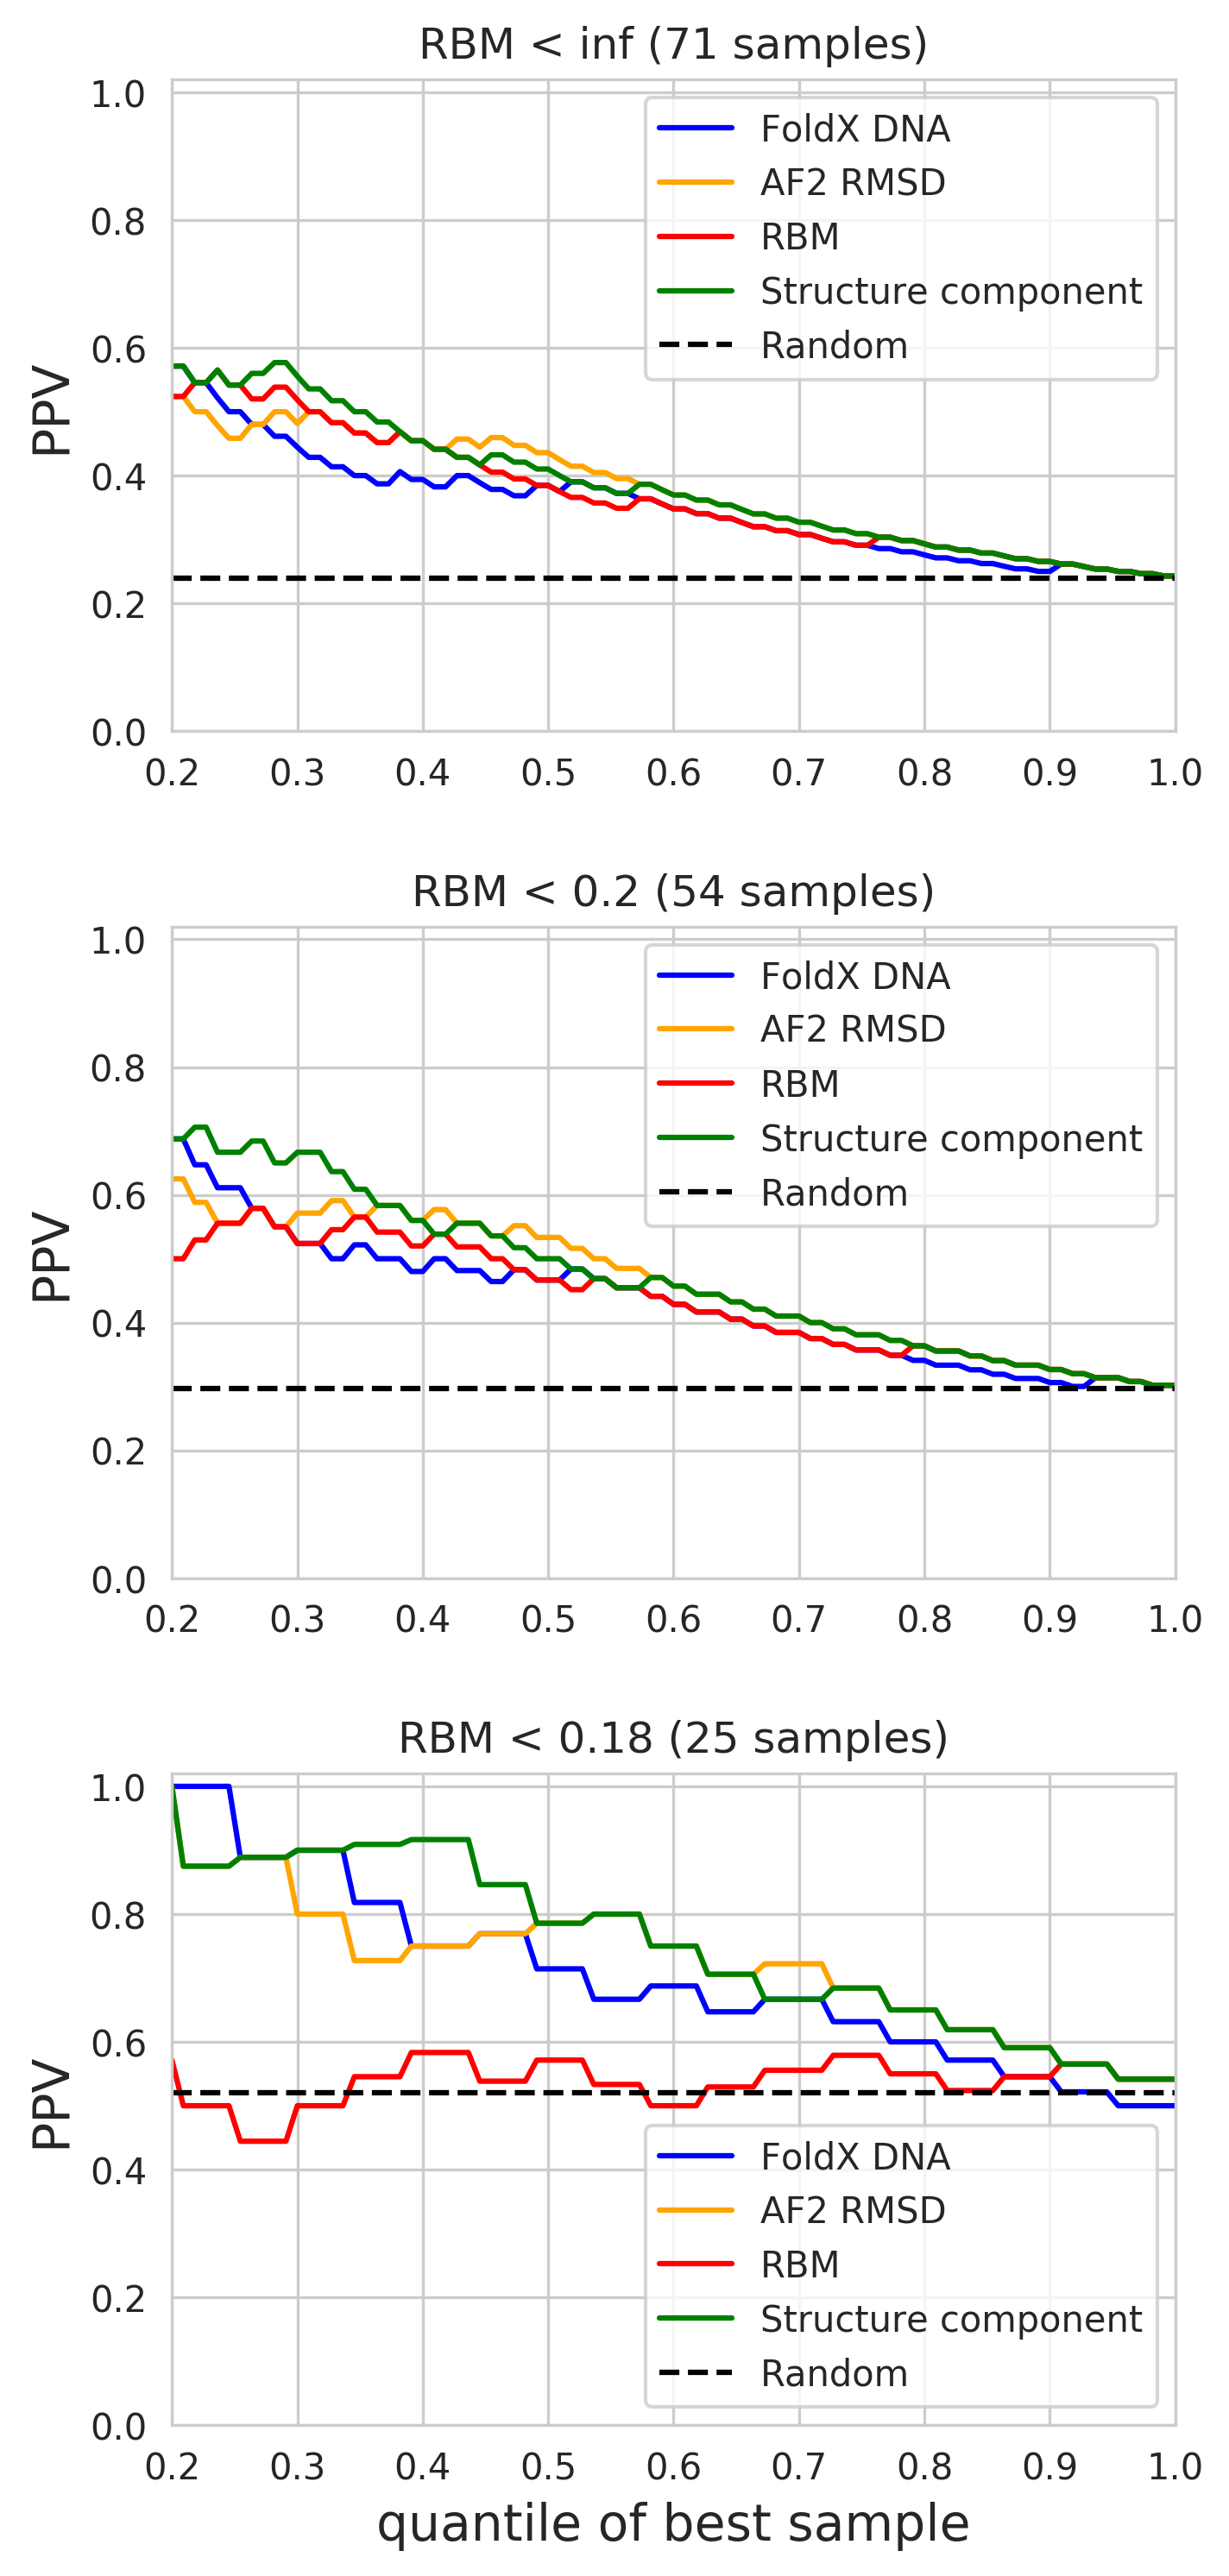

In [167]:
plt.figure(figsize = (5,12))
plt.subplots_adjust( 
                    hspace=.3)

thr = [-np.inf, -.2, -.18]
color = ["blue", "orange", "red", "green"]

for j, (c, e) in enumerate(zip(color, thr)):

    plt.subplot(3,1,j+1)
    y = mcherry>=.6
    #y = rmsd
    legs = []
    for i, (X, name) in enumerate(zip([fx_dna, rmsd,  -e_rbm, -rep[:,0]], ['FoldX DNA', 'AF2 RMSD', 'RBM', 'Structure component'])):
        share_of_active_samples = []
        for x in np.quantile(X[e_rbm>e], np.linspace(.2, 1, 100)):
            idx = np.where((X<x)&(e_rbm>e))[0]
            try: 
                share_of_active_samples.append(sum(y[idx])/len(idx))
            except:
                share_of_active_samples.append(0)
        legs.append(f"{name}")
        plt.plot(np.linspace(.1, 1, 100), share_of_active_samples, c=color[i])
    idx = np.where((e_rbm>e))[0]
    plt.plot([0.2,1], [sum(y[idx])/len(idx),sum(y[idx])/len(idx)], "--",c="black")
    legs.append(f"Random")
    plt.legend(legs)
    #plt.xlim(min(np.quantile(X, np.linspace(0.1, 1., 100))), 100)
    plt.title(f"RBM < {-e} ({len(idx)} samples)")
    if j>1:
        plt.xlabel("quantile of best sample", size = 14)
    plt.ylim(0.,1.02)
    plt.xlim(0.2,1)
    plt.ylabel("PPV", size = 14)
plt.show()

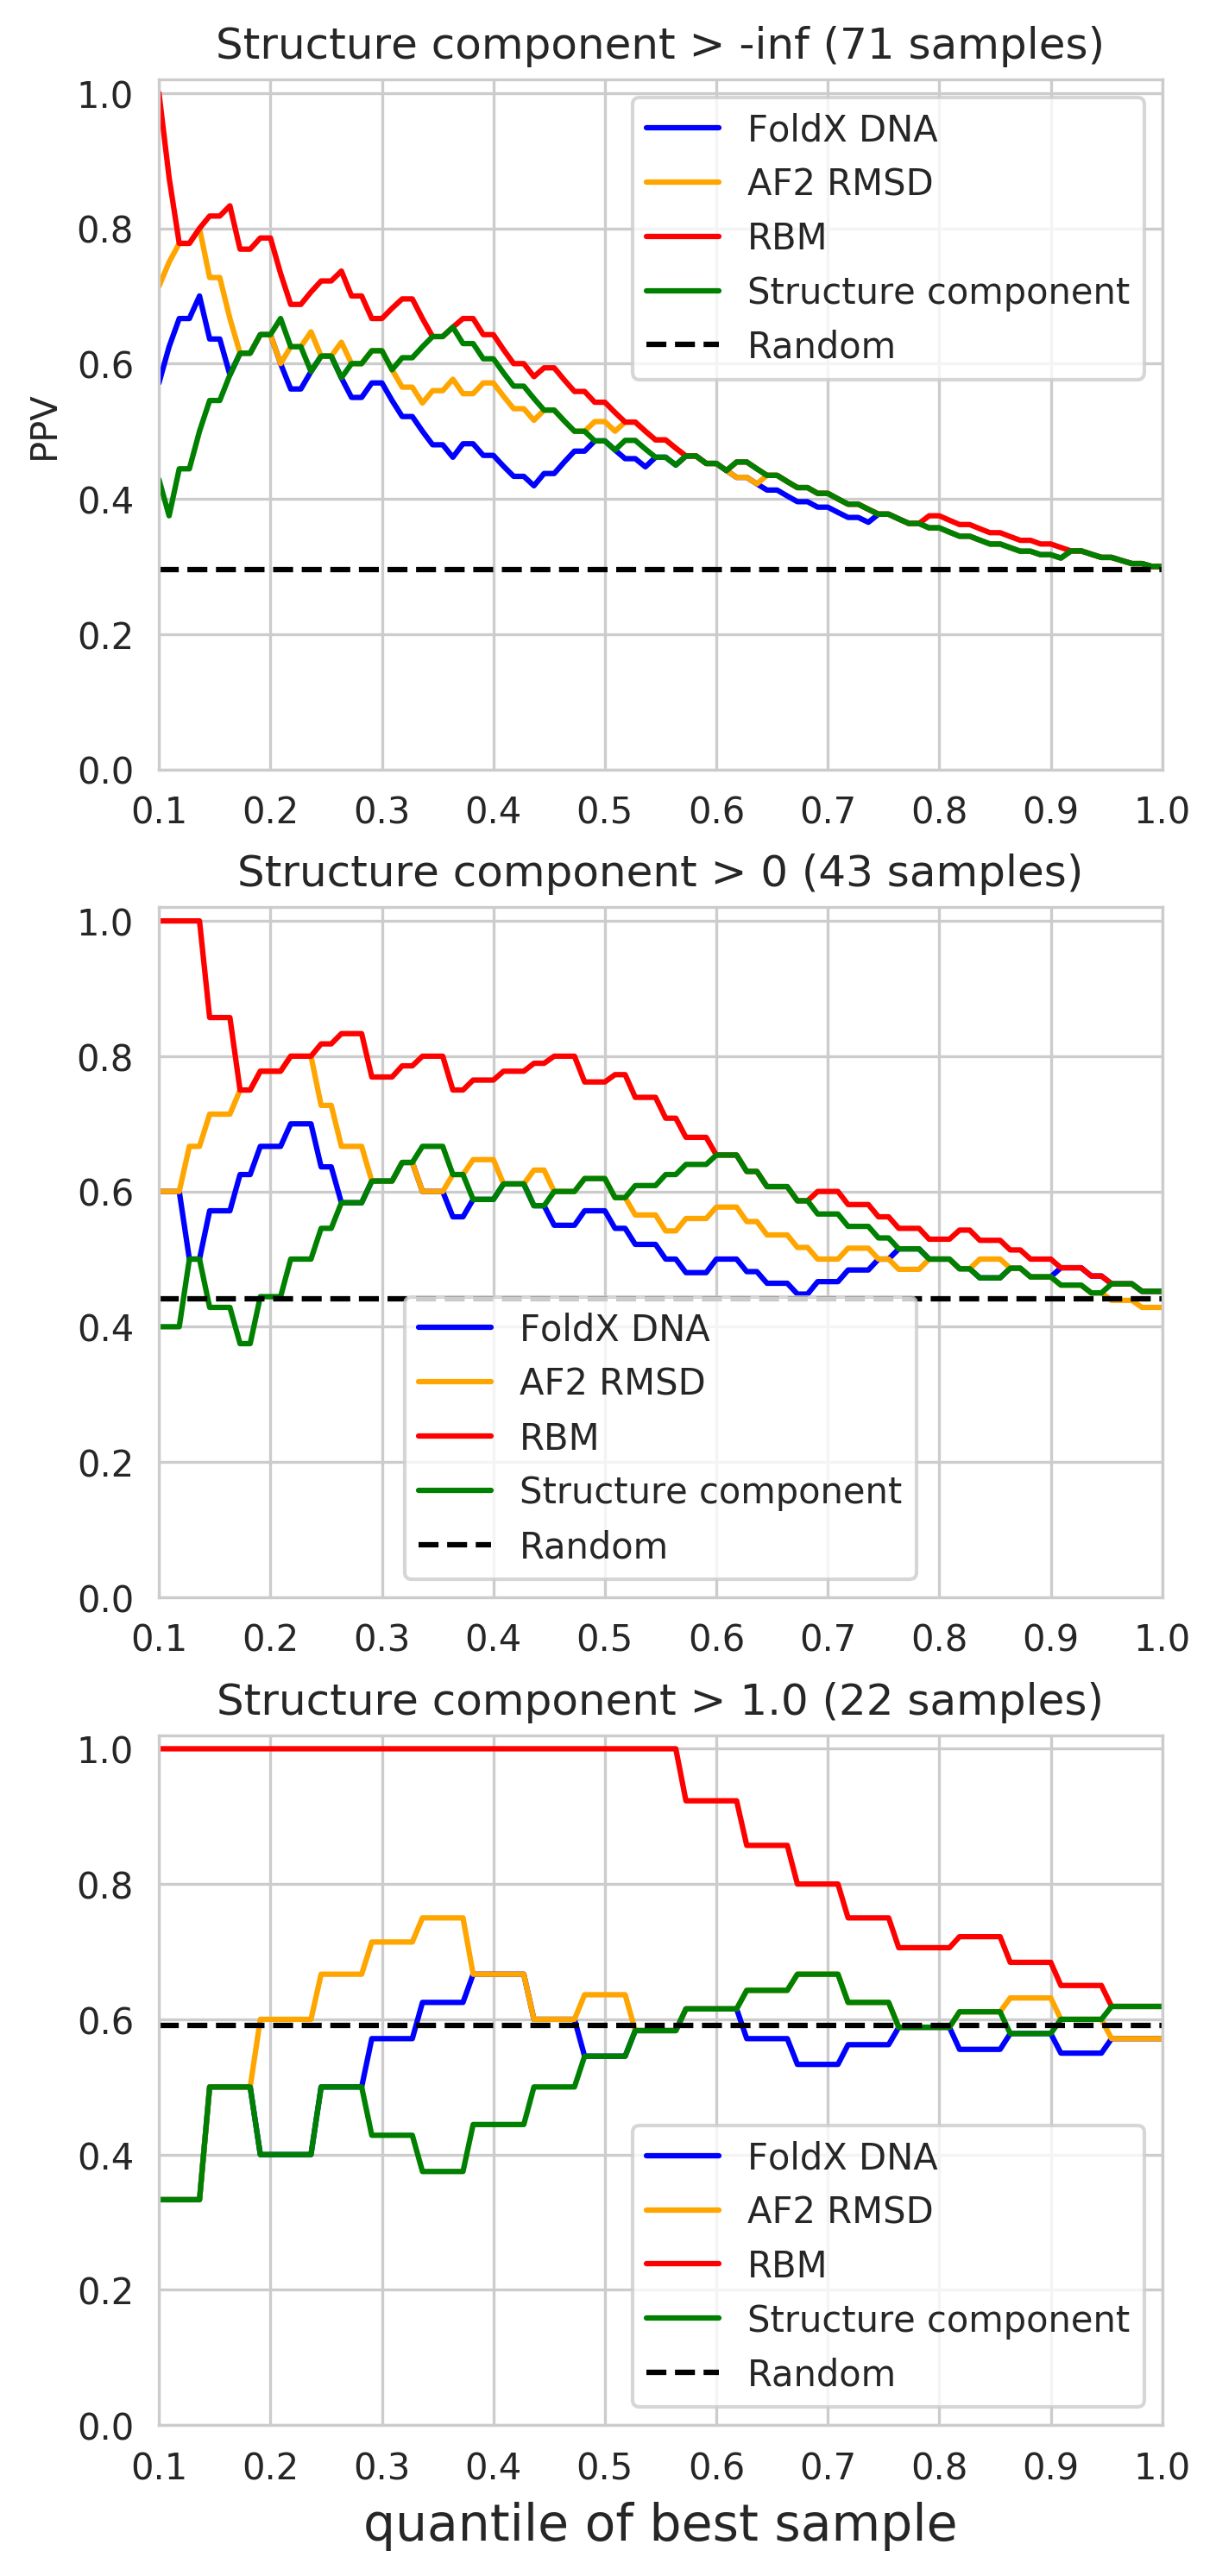

In [168]:
plt.figure(figsize = (5,12))
thr = [np.inf,0,-1.]
color = ["blue", "orange", "red", "green", "purple"]

for j, (c, e) in enumerate(zip(color, thr)):

    plt.subplot(3,1,j+1)
    y = mcherry>=.5
    #y = rmsd
    color = ["blue", "orange", "red", "green", "purple"]
    legs = []
    for i, (X, name) in enumerate(zip([fx_dna, rmsd,  -e_rbm, -rep[:,0]], ['FoldX DNA', 'AF2 RMSD', 'RBM', 'Structure component'])):
        share_of_active_samples = []
        for x in np.quantile(X[-rep[:,0]<e], np.linspace(0.1, 1, 100)):
            idx = np.where((X<x)&(-rep[:,0]<e))[0]
            try: 
                share_of_active_samples.append(sum(y[idx])/len(idx))
            except:
                share_of_active_samples.append(0)
        legs.append(f"{name}")
        plt.plot(np.linspace(.1, 1, 100), share_of_active_samples, c=color[i])
    idx = np.where((-rep[:,0]<e))[0]
    plt.plot([0.1,1], [sum(y[idx])/len(idx),sum(y[idx])/len(idx)], "--",c="black")
    legs.append(f"Random")
    plt.legend(legs)
    #plt.xlim(min(np.quantile(X, np.linspace(0.1, 1., 100))), 100)
    plt.title(f"Structure component > {-e} ({len(idx)} samples)")
    if j>1:
        plt.xlabel("quantile of best sample", size = 14)
    plt.ylim(0.,1.02)
    plt.xlim(0.1,1)
    if j == 0:
        plt.ylabel("PPV")
plt.show()

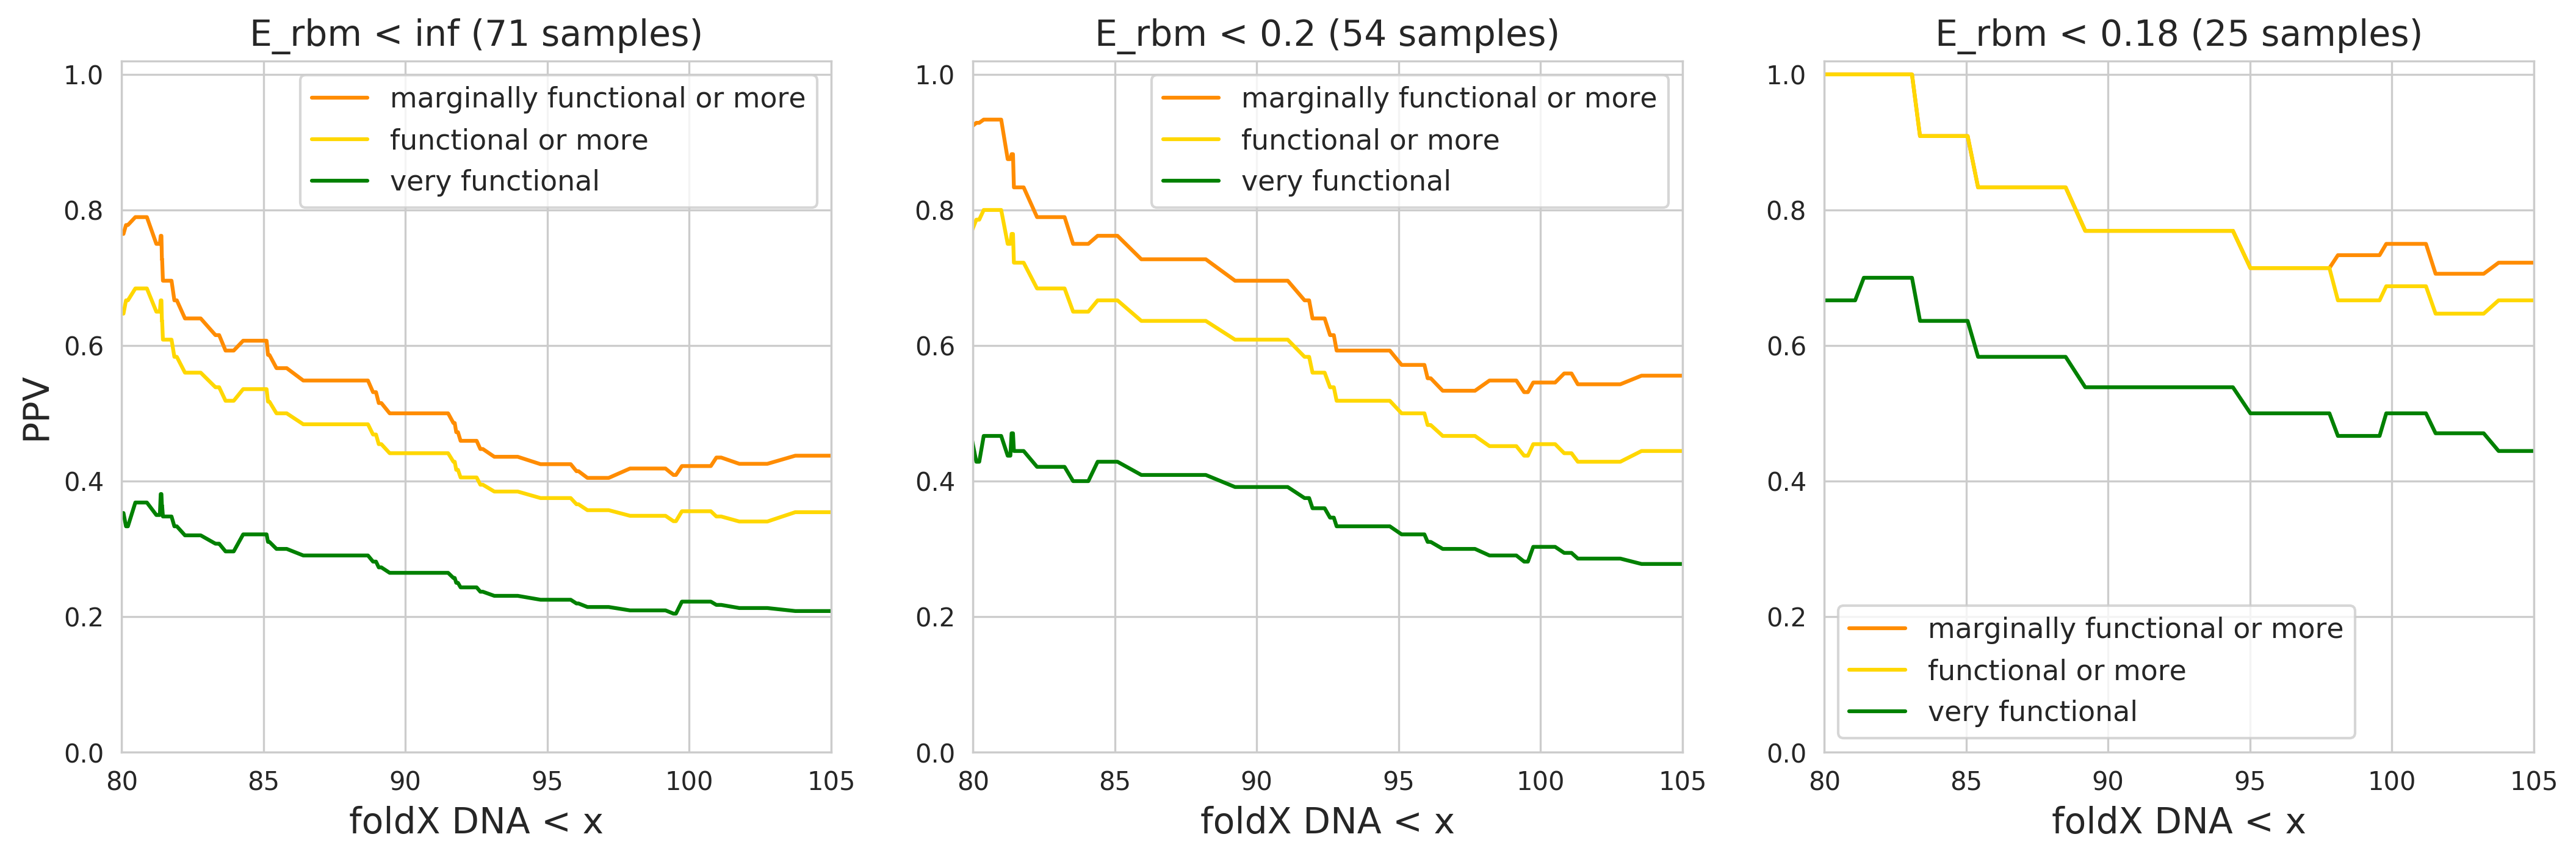

In [222]:
plt.figure(figsize = (17,5))
thr = [-np.inf, -.2,-.18]
X = fx_dna
color = ["darkorange","gold", "green"]
plt.subplots_adjust( 
                    hspace=.3)

for j, (c, e) in enumerate(zip(color, thr)):

    plt.subplot(1,3,j+1)
    #y = rmsd

    legs = []
    for i, (func, name) in enumerate(zip([.2,.5,.8], ['marginally functional or more', 'functional or more', 'very functional'])):
        y = mcherry>=func
        share_of_active_samples = []
        for x in np.quantile(X[e_rbm>=e], np.linspace(0.2, .8, 100)):
            idx = np.where((X<x)&(e_rbm>=e))[0]
            share_of_active_samples.append(sum(y[idx])/len(idx))
                #share_of_active_samples.append(0)
        legs.append(f"{name}")
        plt.plot(np.quantile(X[e_rbm>=e], np.linspace(0.2, .8, 100)), share_of_active_samples, c=color[i])
    plt.legend(legs, fontsize = 11)
    idx = np.where((e_rbm>=e))[0]
    #plt.xlim(min(np.quantile(X, np.linspace(0.1, 1., 100))), 100)
    plt.title(f"E_rbm < {-e} ({len(idx)} samples)", size = 14)
    plt.xlabel("foldX DNA < x", size = 14)
    plt.ylim(0,1.02)
    plt.xlim(80,105)
    if j==0:
        plt.ylabel("PPV", size = 14)
plt.show()

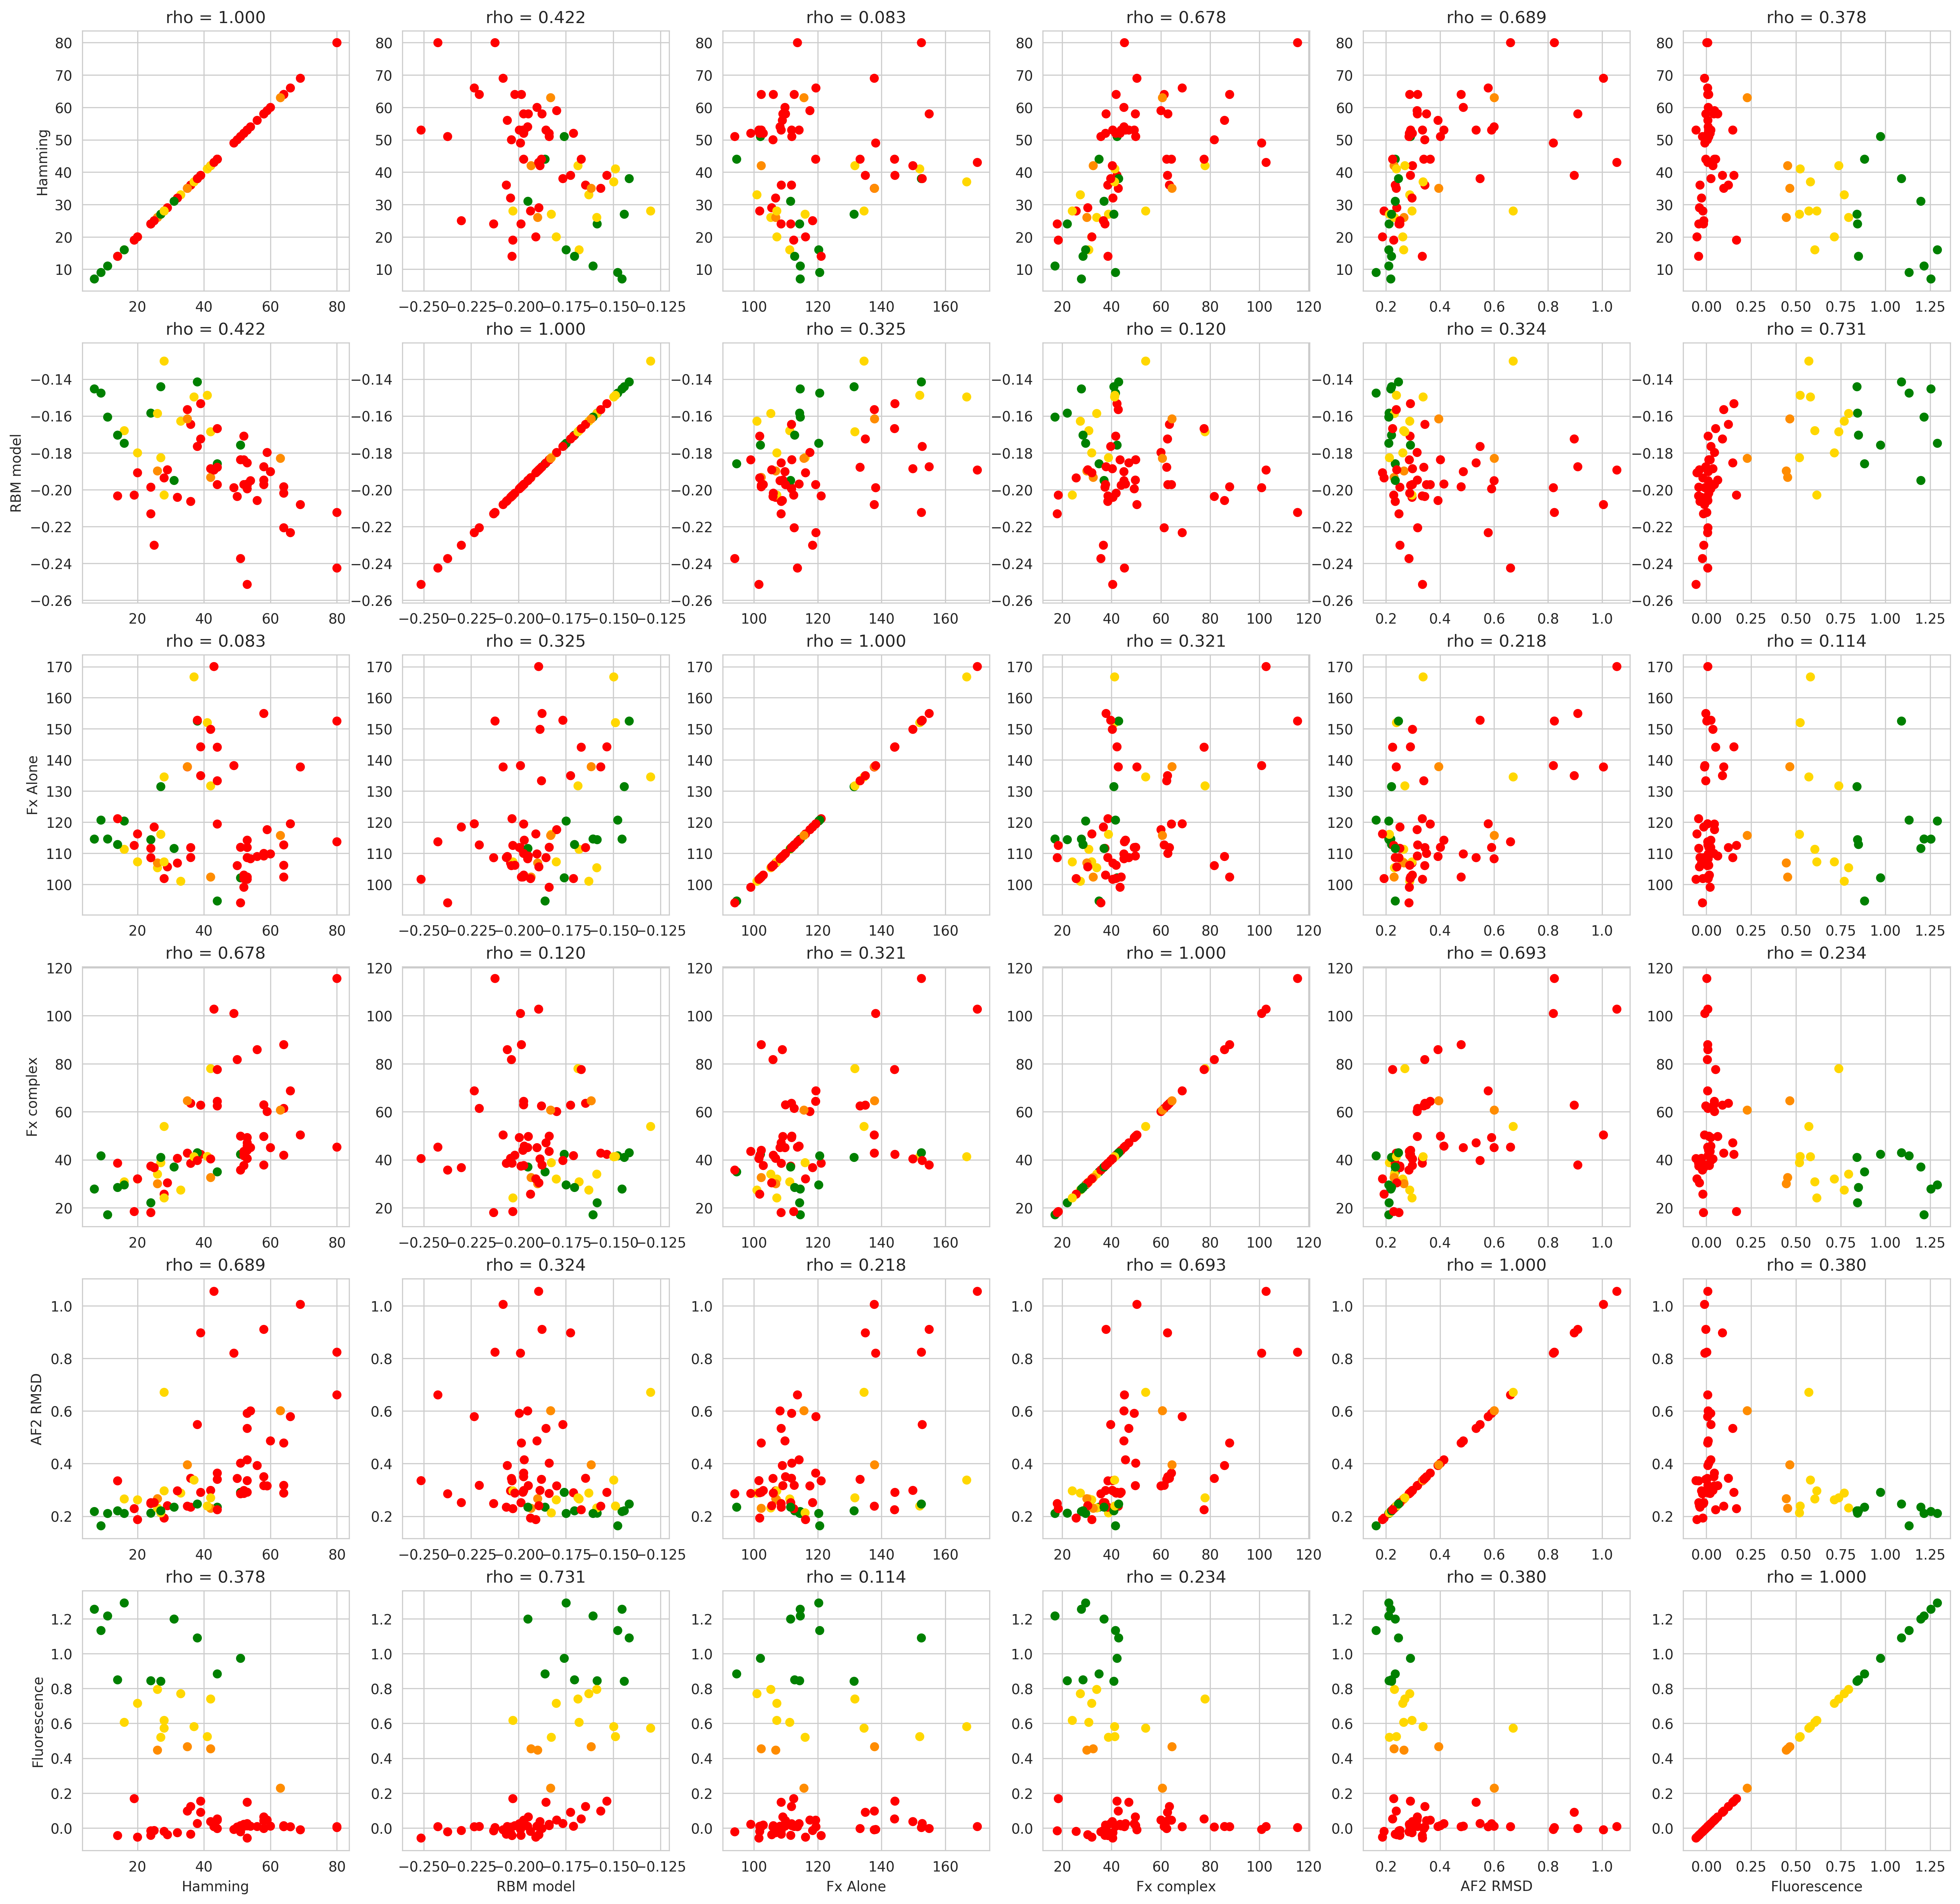

In [163]:
x = [sim,e_rbm,fx,fx_dna,rmsd, mcherry]
labs = ["Hamming", "RBM model", "Fx Alone", "Fx complex", "AF2 RMSD", "Fluorescence"]
N = len(x)

plt.figure(figsize=(4*N,4*N))
for i,x_ in enumerate(x):
    for j,y_ in enumerate(x):

        plt.subplot(N, N, N*i+j+1)
        plt.scatter(list(y_), list(x_), c =  list(functionality), s = 30)
        if j == 0:
            plt.ylabel(labs[i])
        if i == N-1:
            plt.xlabel(labs[j])
        plt.title(f"rho = {np.abs(spearmanr(x_, y_)[0]):.3f}")
plt.show()